#importing files

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import collections 
import numpy
import math
import numpy
!pip install openpyxl
!pip install xlwt
!pip install xlrd==1.2.0
!pip install xlutils
from openpyxl import load_workbook
import xlwt
import xlrd
from xlutils.copy import copy
import pandas as pd
import openpyxl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 


#Image Detail Function

In [2]:
def image_details(path): 
  image = cv2.imread(path)
  rows = len(image)
  columns = len(image[0])
  grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return rows, columns, grayscale 


#Bfs Search

In [3]:
def bfs (x, y, path):
  rows, cols, image = image_details(path)
  q = collections.deque()
  visit = set()
  visit.add((x,y))
  q.append((x,y))

  while q: 
    r, c = q.popleft()
    directions = [[1,0],[-1,0],[0,1],[0,-1]]

    for dr, dc in directions: 
      if r+dr  in range(rows) and c+dc in range(cols) and image[r+dr][c+dc] <230 and (r+dr, c+dc) not in visit:
        q.append((r+dr, c+dc))
        visit.add((r+dr, c+dc))
  return visit 

#Mean and Isapprox functions 

In [4]:
def meanofset(aoao):
  l = len(aoao)
  totalx = 0
  totaly = 0 
  for x, y in aoao:
    totalx += x
    totaly += y
  meanx = totalx/l
  meany = totaly/l 
  return (meanx, meany)

def isapprox(aoao, bobo):
  aoaox = meanofset(aoao)[0]
  aoaoy = meanofset(aoao)[1] 
  bobox = meanofset(bobo)[0]
  boboy = meanofset(bobo)[1]
  dist = math.sqrt( (aoaox-bobox)*(aoaox-bobox) + (boboy - aoaoy)*(boboy - aoaoy) )
  return dist

#Adjust Values Function

In [5]:
def adjustvalues(myset, side_len):
  mean = meanofset(myset)
  newset = set()
  for ele in myset: 
    x = ele[0] - int(mean[0]) + int(side_len/2)
    y = ele[1] - int(mean[1]) + int(side_len/2)
    newset.add((x,y))
  return newset

#Total number of chars function with out space and newline 

In [6]:
def actualchars(line): 
  total = len(line)
  charlen = 0 
  for i in range(total): 
    if line[i] != ' ' and line[i]!= '\n': 
      charlen = charlen + 1 
  return charlen

#Print Text 

In [7]:

with open('/content/drive/MyDrive/intelligent_font_files/PNG+TXT_files/page1/page1.txt') as f:
    lines = f.readlines()
print(lines)
print(type(lines[0]))


['following way principles are universal truths they\n', 'go deeper than values criminals share common values\n', 'where as principles are universally accepted by\n', 'everyone as good as and decent identifying what you\n', 'want to become requires that you clarify the princi\n', 'ples that will govern your life and career you can then\n', 'put those in your box and condition your subconsious\n', 'accordingly eventually you will put them out in the form\n', 'of daily choices which ultimately define your quality of\n', 'life and career i had a long row to hoe when i went throu\n', 'gh the process of outlining what kind of person i wanted\n', 'to become i was after all a career criminal neverth\n', 'i followed the advice outlined in conveys book to get a\n', 'clear picture of what i wanted to become consider the\n', 'following exercise as way to help you figure this out\n', 'imagine yourself attending the funeral of someone\n', 'who is beloved by all who know him as you enter the\n', 'ro

#set to image

In [8]:
def settoimage(yoyo, side_len): 
  x = [[255 for i in range(side_len)] for j in range(side_len)]
  for ro,co in yoyo: 
    if ro in range(side_len) and co in range(side_len):
      x[ro][co] =0
  # x = numpy.array(x)
  # cv2_imshow(x)
  return x 

def mylisttoimage(listt, sidelen): 
  listt = numpy.array(listt)
  cv2_imshow(listt)
  
yoyo = {(25, 25), (26, 26), (28, 28), (29, 29), (30, 30), (31, 31)}
myarr = settoimage(yoyo, 64)

#Creating Excel SHeet

In [18]:
filepath = "/content/FinalDataset.xlsx"
wb = openpyxl.Workbook()
wb.save(filepath)

rb = xlrd.open_workbook('/content/FinalDataset.xlsx')
# copy the contents of excel file
wb = copy(rb)
print(wb)
# open the first sheet
w_sheet = wb.get_sheet(0)

w_sheet.write(0,0,'Prev Charactor')
w_sheet.write(0,1,'Charactor')
w_sheet.write(0,2,'Next Charactor')
w_sheet.write(0,3,'spatial info')
w_sheet.write(0,4,'shape info') 
wb.save('/content/FinalDataset.xlsx')


In [20]:
def positionofchar(yoyo, lineno, charno): 
  mean = meanofset(yoyo)
  return list([[lineno, charno], [mean[0], mean[1]]])


resss = positionofchar({(1,0), (3,4), (56,7), (34, 99)}, 7, 55)
print(type(resss))
print(resss)
resss = str(resss)
print(type(resss))
resss = eval(resss)
print(type(resss))


<class 'list'>
[[7, 55], [23.5, 27.5]]
<class 'str'>
<class 'list'>


#add content to xlsx file 

f
prevchar: 32  currChar: 102  Nextchar: 111
image is :


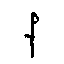

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 102  currChar: 111  Nextchar: 108 lineno: 0 charno:1
image is :


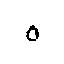

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 111  currChar: 108  Nextchar: 108 lineno: 0 charno:2
image is :


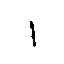

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 111 lineno: 0 charno:3
image is :


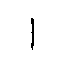

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 119 lineno: 0 charno:4
image is :


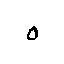

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 111  currChar: 119  Nextchar: 105 lineno: 0 charno:5
image is :


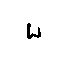

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 119  currChar: 105  Nextchar: 110 lineno: 0 charno:6
image is :


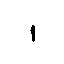

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 0 charno:7
image is :


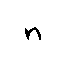

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 0 charno:8
image is :


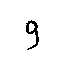

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 0 charno:10
image is :


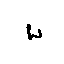

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 121 lineno: 0 charno:11
image is :


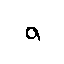

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 97  currChar: 121  Nextchar: 32 lineno: 0 charno:12
image is :


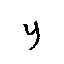

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 114 lineno: 0 charno:14
image is :


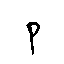

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 112  currChar: 114  Nextchar: 105 lineno: 0 charno:15
image is :


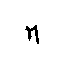

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 110 lineno: 0 charno:16
image is :


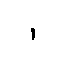

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 99 lineno: 0 charno:17
image is :


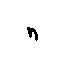

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 110  currChar: 99  Nextchar: 105 lineno: 0 charno:18
image is :


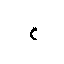

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 99  currChar: 105  Nextchar: 112 lineno: 0 charno:19
image is :


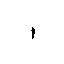

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 105  currChar: 112  Nextchar: 108 lineno: 0 charno:20
image is :


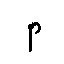

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 112  currChar: 108  Nextchar: 101 lineno: 0 charno:21
image is :


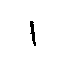

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 108  currChar: 101  Nextchar: 115 lineno: 0 charno:22
image is :


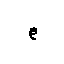

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 0 charno:23
image is :


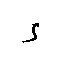

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 114 lineno: 0 charno:25
image is :


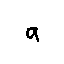

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 0 charno:26
image is :


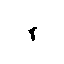

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 0 charno:27
image is :


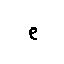

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 32  currChar: 117  Nextchar: 110 lineno: 0 charno:29
image is :


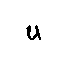

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 117  currChar: 110  Nextchar: 105 lineno: 0 charno:30
image is :


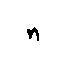

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 110  currChar: 105  Nextchar: 118 lineno: 0 charno:31
image is :


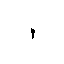

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 105  currChar: 118  Nextchar: 101 lineno: 0 charno:32
image is :


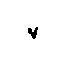

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 114 lineno: 0 charno:33
image is :


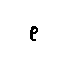

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 115 lineno: 0 charno:34
image is :


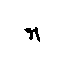

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 114  currChar: 115  Nextchar: 97 lineno: 0 charno:35
image is :


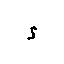

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 115  currChar: 97  Nextchar: 108 lineno: 0 charno:36
image is :


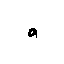

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 32 lineno: 0 charno:37
image is :


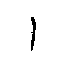

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 114 lineno: 0 charno:39
image is :


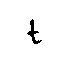

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 116  currChar: 114  Nextchar: 117 lineno: 0 charno:40
image is :


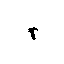

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 114  currChar: 117  Nextchar: 116 lineno: 0 charno:41
image is :


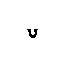

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 104 lineno: 0 charno:42
image is :


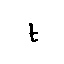

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 115 lineno: 0 charno:43
image is :


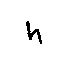

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 104  currChar: 115  Nextchar: 32 lineno: 0 charno:44
image is :


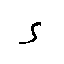

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 0 charno:46
image is :


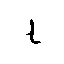

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 0 charno:47
image is :


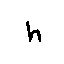

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 121 lineno: 0 charno:48
image is :


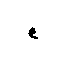

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 101  currChar: 121  Nextchar: 32 lineno: 0 charno:49
image is :


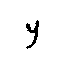

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 0 counted chars:44 actual chars: 44 lineno: 0 charno:50
------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 111
image is :


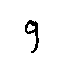

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 103  currChar: 111  Nextchar: 32 lineno: 1 charno:1
image is :


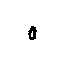

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 32  currChar: 100  Nextchar: 101 lineno: 1 charno:3
image is :


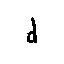

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 100  currChar: 101  Nextchar: 101 lineno: 1 charno:4
image is :


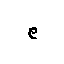

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 112 lineno: 1 charno:5
image is :


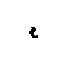

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 101  currChar: 112  Nextchar: 101 lineno: 1 charno:6
image is :


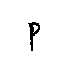

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 112  currChar: 101  Nextchar: 114 lineno: 1 charno:7
image is :


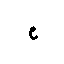

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 1 charno:8
image is :


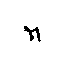

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 1 charno:10
image is :


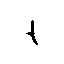

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 97 lineno: 1 charno:11
image is :


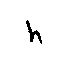

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 110 lineno: 1 charno:12
image is :


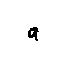

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 32 lineno: 1 charno:13
image is :


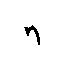

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 32  currChar: 118  Nextchar: 97 lineno: 1 charno:15
image is :


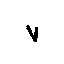

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 118  currChar: 97  Nextchar: 108 lineno: 1 charno:16
image is :


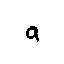

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 117 lineno: 1 charno:17
image is :


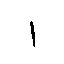

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 108  currChar: 117  Nextchar: 101 lineno: 1 charno:18
image is :


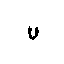

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 117  currChar: 101  Nextchar: 115 lineno: 1 charno:19
image is :


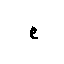

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 1 charno:20
image is :


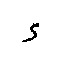

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 114 lineno: 1 charno:22
image is :


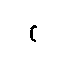

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 99  currChar: 114  Nextchar: 105 lineno: 1 charno:23
image is :


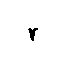

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 109 lineno: 1 charno:24
image is :


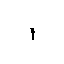

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 105  currChar: 109  Nextchar: 105 lineno: 1 charno:25
image is :


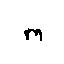

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 109  currChar: 105  Nextchar: 110 lineno: 1 charno:26
image is :


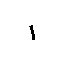

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 97 lineno: 1 charno:27
image is :


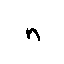

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 110  currChar: 97  Nextchar: 108 lineno: 1 charno:28
image is :


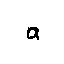

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 115 lineno: 1 charno:29
image is :


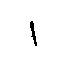

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 108  currChar: 115  Nextchar: 32 lineno: 1 charno:30
image is :


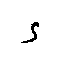

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 104 lineno: 1 charno:32
image is :


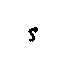

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 115  currChar: 104  Nextchar: 97 lineno: 1 charno:33
image is :


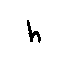

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 114 lineno: 1 charno:34
image is :


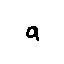

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 1 charno:35
image is :


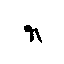

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 1 charno:36
image is :


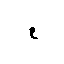

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 111 lineno: 1 charno:38
image is :


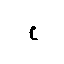

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 109 lineno: 1 charno:39
image is :


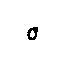

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 109 lineno: 1 charno:40
image is :


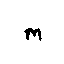

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 109  currChar: 109  Nextchar: 111 lineno: 1 charno:41
image is :


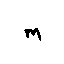

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 109  currChar: 111  Nextchar: 110 lineno: 1 charno:42
image is :


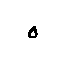

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 32 lineno: 1 charno:43
image is :


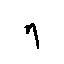

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 32  currChar: 118  Nextchar: 97 lineno: 1 charno:45
image is :


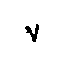

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 118  currChar: 97  Nextchar: 108 lineno: 1 charno:46
image is :


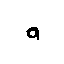

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 117 lineno: 1 charno:47
image is :


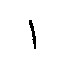

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 108  currChar: 117  Nextchar: 101 lineno: 1 charno:48
image is :


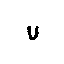

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 117  currChar: 101  Nextchar: 115 lineno: 1 charno:49
image is :


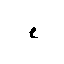

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 1 charno:50
image is :


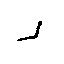

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 1 counted chars:44 actual chars: 44 lineno: 1 charno:51
------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104
image is :


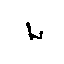

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 101 lineno: 2 charno:1
image is :


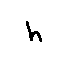

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 114 lineno: 2 charno:2
image is :


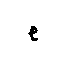

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 101 lineno: 2 charno:3
image is :


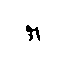

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 2 charno:4
image is :


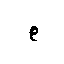

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 2 charno:6
image is :


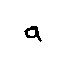

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 2 charno:7
image is :


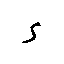

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 114 lineno: 2 charno:9
image is :


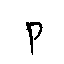

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 112  currChar: 114  Nextchar: 105 lineno: 2 charno:10
image is :


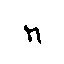

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 110 lineno: 2 charno:11
image is :


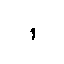

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 99 lineno: 2 charno:12
image is :


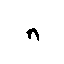

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 110  currChar: 99  Nextchar: 105 lineno: 2 charno:13
image is :


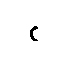

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 99  currChar: 105  Nextchar: 112 lineno: 2 charno:14
image is :


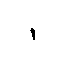

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 105  currChar: 112  Nextchar: 108 lineno: 2 charno:15
image is :


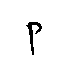

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 112  currChar: 108  Nextchar: 101 lineno: 2 charno:16
image is :


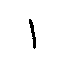

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 108  currChar: 101  Nextchar: 115 lineno: 2 charno:17
image is :


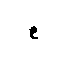

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 2 charno:18
image is :


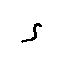

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 114 lineno: 2 charno:20
image is :


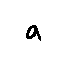

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 2 charno:21
image is :


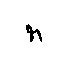

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 2 charno:22
image is :


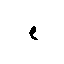

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 32  currChar: 117  Nextchar: 110 lineno: 2 charno:24
image is :


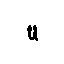

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 117  currChar: 110  Nextchar: 105 lineno: 2 charno:25
image is :


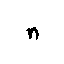

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 110  currChar: 105  Nextchar: 118 lineno: 2 charno:26
image is :


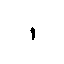

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 105  currChar: 118  Nextchar: 101 lineno: 2 charno:27
image is :


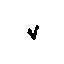

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 114 lineno: 2 charno:28
image is :


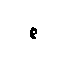

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 115 lineno: 2 charno:29
image is :


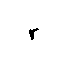

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 114  currChar: 115  Nextchar: 97 lineno: 2 charno:30
image is :


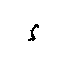

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 115  currChar: 97  Nextchar: 108 lineno: 2 charno:31
image is :


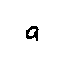

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 108 lineno: 2 charno:32
image is :


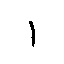

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 121 lineno: 2 charno:33
image is :


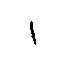

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 2 charno:34
image is :


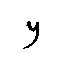

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 99 lineno: 2 charno:36
image is :


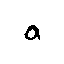

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 97  currChar: 99  Nextchar: 99 lineno: 2 charno:37
image is :


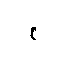

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 99  currChar: 99  Nextchar: 101 lineno: 2 charno:38
image is :


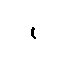

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 112 lineno: 2 charno:39
image is :


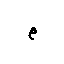

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 101  currChar: 112  Nextchar: 116 lineno: 2 charno:40
image is :


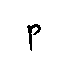

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 112  currChar: 116  Nextchar: 101 lineno: 2 charno:41
image is :


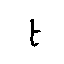

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 100 lineno: 2 charno:42
image is :


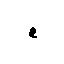

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 2 charno:43
image is :


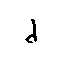

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 121 lineno: 2 charno:45
image is :


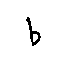

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 98  currChar: 121  Nextchar: 32 lineno: 2 charno:46
image is :


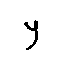

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 2 counted chars:41 actual chars: 41 lineno: 2 charno:47
------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 32  currChar: 101  Nextchar: 118
image is :


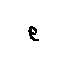

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 101  currChar: 118  Nextchar: 101 lineno: 3 charno:1
image is :


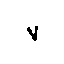

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 114 lineno: 3 charno:2
image is :


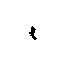

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 121 lineno: 3 charno:3
image is :


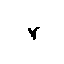

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 114  currChar: 121  Nextchar: 111 lineno: 3 charno:4
image is :


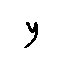

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 110 lineno: 3 charno:5
image is :


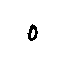

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 101 lineno: 3 charno:6
image is :


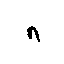

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 32 lineno: 3 charno:7
image is :


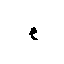

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 3 charno:9
image is :


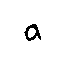

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 3 charno:10
image is :


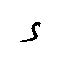

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 111 lineno: 3 charno:12
image is :


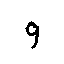

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 103  currChar: 111  Nextchar: 111 lineno: 3 charno:13
image is :


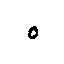

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 111  currChar: 111  Nextchar: 100 lineno: 3 charno:14
image is :


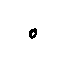

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 111  currChar: 100  Nextchar: 32 lineno: 3 charno:15
image is :


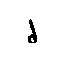

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 3 charno:17
image is :


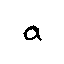

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 3 charno:18
image is :


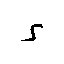

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 3 charno:20
image is :


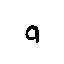

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 3 charno:21
image is :


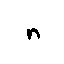

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 3 charno:22
image is :


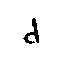

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 32  currChar: 100  Nextchar: 101 lineno: 3 charno:24
image is :


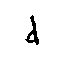

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 100  currChar: 101  Nextchar: 99 lineno: 3 charno:25
image is :


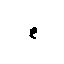

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 101  currChar: 99  Nextchar: 101 lineno: 3 charno:26
image is :


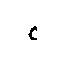

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 110 lineno: 3 charno:27
image is :


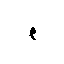

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 116 lineno: 3 charno:28
image is :


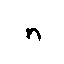

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 32 lineno: 3 charno:29
image is :


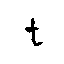

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 100 lineno: 3 charno:31
image is :


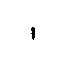

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 105  currChar: 100  Nextchar: 101 lineno: 3 charno:32
image is :


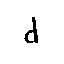

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 100  currChar: 101  Nextchar: 110 lineno: 3 charno:33
image is :


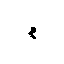

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 116 lineno: 3 charno:34
image is :


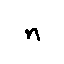

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 105 lineno: 3 charno:35
image is :


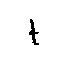

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 116  currChar: 105  Nextchar: 102 lineno: 3 charno:36
image is :


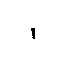

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 105  currChar: 102  Nextchar: 121 lineno: 3 charno:37
image is :


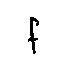

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 102  currChar: 121  Nextchar: 105 lineno: 3 charno:38
image is :


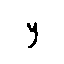

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 121  currChar: 105  Nextchar: 110 lineno: 3 charno:39
image is :


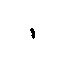

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 3 charno:40
image is :


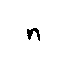

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 3 charno:41
image is :


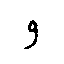

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 3 charno:43
image is :


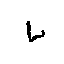

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 97 lineno: 3 charno:44
image is :


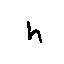

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 3 charno:45
image is :


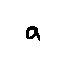

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 3 charno:46
image is :


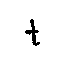

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 3 charno:48
image is :


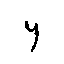

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 3 charno:49
image is :


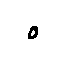

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 3 charno:50
image is :


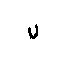

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 3 counted chars:43 actual chars: 43 lineno: 3 charno:51
------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97
image is :


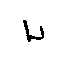

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 110 lineno: 4 charno:1
image is :


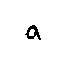

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 116 lineno: 4 charno:2
image is :


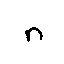

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 32 lineno: 4 charno:3
image is :


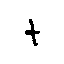

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 4 charno:5
image is :


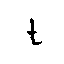

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 4 charno:6
image is :


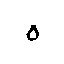

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 101 lineno: 4 charno:8
image is :


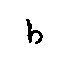

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 98  currChar: 101  Nextchar: 99 lineno: 4 charno:9
image is :


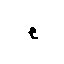

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 101  currChar: 99  Nextchar: 111 lineno: 4 charno:10
image is :


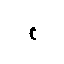

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 109 lineno: 4 charno:11
image is :


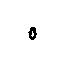

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 101 lineno: 4 charno:12
image is :


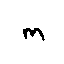

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 109  currChar: 101  Nextchar: 32 lineno: 4 charno:13
image is :


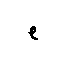

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 32  currChar: 114  Nextchar: 101 lineno: 4 charno:15
image is :


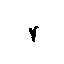

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 113 lineno: 4 charno:16
image is :


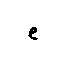

------------------------------------------------------------------------------------------------------------------------------------------------------
q
prevchar: 101  currChar: 113  Nextchar: 117 lineno: 4 charno:17
image is :


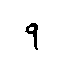

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 113  currChar: 117  Nextchar: 105 lineno: 4 charno:18
image is :


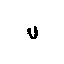

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 117  currChar: 105  Nextchar: 114 lineno: 4 charno:19
image is :


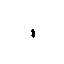

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 105  currChar: 114  Nextchar: 101 lineno: 4 charno:20
image is :


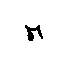

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 115 lineno: 4 charno:21
image is :


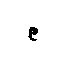

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 4 charno:22
image is :


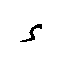

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 4 charno:24
image is :


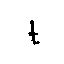

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 97 lineno: 4 charno:25
image is :


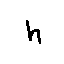

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 4 charno:26
image is :


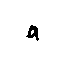

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 4 charno:27
image is :


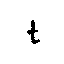

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 4 charno:29
image is :


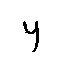

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 4 charno:30
image is :


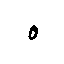

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 4 charno:31
image is :


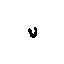

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 108 lineno: 4 charno:33
image is :


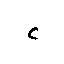

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 99  currChar: 108  Nextchar: 97 lineno: 4 charno:34
image is :


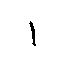

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 108  currChar: 97  Nextchar: 114 lineno: 4 charno:35
image is :


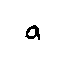

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 105 lineno: 4 charno:36
image is :


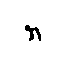

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 102 lineno: 4 charno:37
image is :


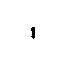

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 105  currChar: 102  Nextchar: 121 lineno: 4 charno:38
image is :


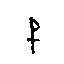

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 102  currChar: 121  Nextchar: 32 lineno: 4 charno:39
image is :


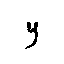

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 4 charno:41
image is :


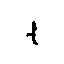

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 4 charno:42
image is :


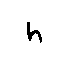

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 4 charno:43
image is :


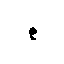

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 114 lineno: 4 charno:45
image is :


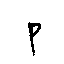

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 112  currChar: 114  Nextchar: 105 lineno: 4 charno:46
image is :


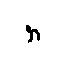

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 110 lineno: 4 charno:47
image is :


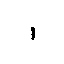

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 99 lineno: 4 charno:48
image is :


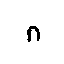

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 110  currChar: 99  Nextchar: 105 lineno: 4 charno:49
image is :


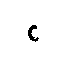

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 99  currChar: 105  Nextchar: 32 lineno: 4 charno:50
image is :


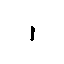

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 4 counted chars:43 actual chars: 43 lineno: 4 charno:51
------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 108
image is :


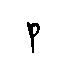

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 112  currChar: 108  Nextchar: 101 lineno: 5 charno:1
image is :


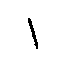

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 108  currChar: 101  Nextchar: 115 lineno: 5 charno:2
image is :


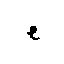

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 5 charno:3
image is :


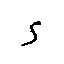

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 5 charno:5
image is :


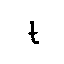

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 97 lineno: 5 charno:6
image is :


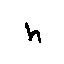

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 5 charno:7
image is :


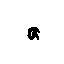

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 5 charno:8
image is :


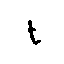

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 105 lineno: 5 charno:10
image is :


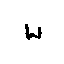

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 119  currChar: 105  Nextchar: 108 lineno: 5 charno:11
image is :


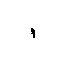

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 105  currChar: 108  Nextchar: 108 lineno: 5 charno:12
image is :


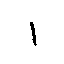

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 32 lineno: 5 charno:13
image is :


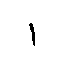

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 111 lineno: 5 charno:15
image is :


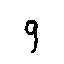

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 103  currChar: 111  Nextchar: 118 lineno: 5 charno:16
image is :


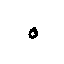

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 111  currChar: 118  Nextchar: 101 lineno: 5 charno:17
image is :


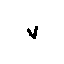

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 114 lineno: 5 charno:18
image is :


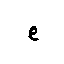

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 110 lineno: 5 charno:19
image is :


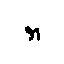

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 114  currChar: 110  Nextchar: 32 lineno: 5 charno:20
image is :


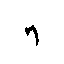

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 5 charno:22
image is :


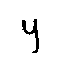

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 5 charno:23
image is :


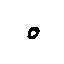

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 5 charno:24
image is :


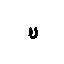

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 5 charno:25
image is :


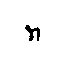

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 105 lineno: 5 charno:27
image is :


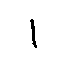

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 108  currChar: 105  Nextchar: 102 lineno: 5 charno:28
image is :


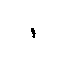

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 105  currChar: 102  Nextchar: 101 lineno: 5 charno:29
image is :


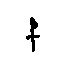

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 102  currChar: 101  Nextchar: 32 lineno: 5 charno:30
image is :


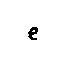

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 5 charno:32
image is :


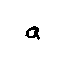

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 5 charno:33
image is :


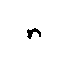

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 5 charno:34
image is :


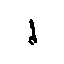

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 97 lineno: 5 charno:36
image is :


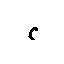

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 99  currChar: 97  Nextchar: 114 lineno: 5 charno:37
image is :


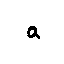

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 5 charno:38
image is :


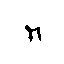

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 101 lineno: 5 charno:39
image is :


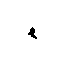

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 114 lineno: 5 charno:40
image is :


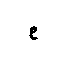

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 5 charno:41
image is :


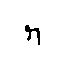

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 5 charno:43
image is :


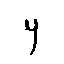

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 5 charno:44
image is :


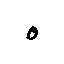

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 5 charno:45
image is :


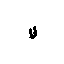

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 97 lineno: 5 charno:47
image is :


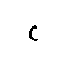

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 99  currChar: 97  Nextchar: 110 lineno: 5 charno:48
image is :


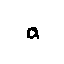

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 32 lineno: 5 charno:49
image is :


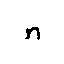

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 5 charno:51
image is :


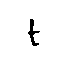

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 5 charno:52
image is :


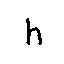

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 110 lineno: 5 charno:53
image is :


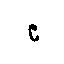

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 32 lineno: 5 charno:54
image is :


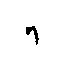

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 5 counted chars:45 actual chars: 45 lineno: 5 charno:55
------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 117
image is :


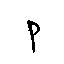

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 112  currChar: 117  Nextchar: 116 lineno: 6 charno:1
image is :


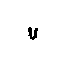

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 32 lineno: 6 charno:2
image is :


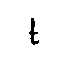

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 6 charno:4
image is :


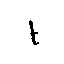

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 111 lineno: 6 charno:5
image is :


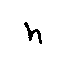

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 104  currChar: 111  Nextchar: 115 lineno: 6 charno:6
image is :


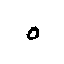

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 111  currChar: 115  Nextchar: 101 lineno: 6 charno:7
image is :


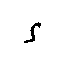

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 115  currChar: 101  Nextchar: 32 lineno: 6 charno:8
image is :


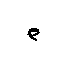

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 110 lineno: 6 charno:10
image is :


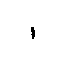

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 32 lineno: 6 charno:11
image is :


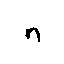

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 6 charno:13
image is :


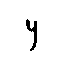

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 6 charno:14
image is :


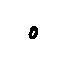

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 6 charno:15
image is :


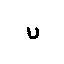

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 6 charno:16
image is :


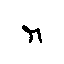

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 111 lineno: 6 charno:18
image is :


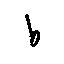

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 98  currChar: 111  Nextchar: 120 lineno: 6 charno:19
image is :


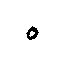

------------------------------------------------------------------------------------------------------------------------------------------------------
x
prevchar: 111  currChar: 120  Nextchar: 32 lineno: 6 charno:20
image is :


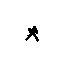

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 6 charno:22
image is :


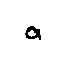

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 6 charno:23
image is :


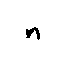

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 6 charno:24
image is :


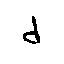

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 111 lineno: 6 charno:26
image is :


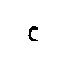

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 110 lineno: 6 charno:27
image is :


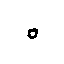

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 100 lineno: 6 charno:28
image is :


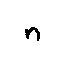

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 105 lineno: 6 charno:29
image is :


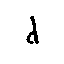

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 100  currChar: 105  Nextchar: 116 lineno: 6 charno:30
image is :


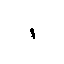

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 105  currChar: 116  Nextchar: 105 lineno: 6 charno:31
image is :


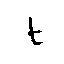

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 116  currChar: 105  Nextchar: 111 lineno: 6 charno:32
image is :


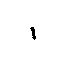

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 105  currChar: 111  Nextchar: 110 lineno: 6 charno:33
image is :


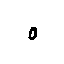

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 32 lineno: 6 charno:34
image is :


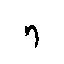

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 6 charno:36
image is :


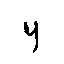

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 6 charno:37
image is :


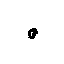

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 6 charno:38
image is :


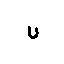

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 6 charno:39
image is :


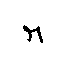

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 117 lineno: 6 charno:41
image is :


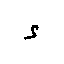

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 115  currChar: 117  Nextchar: 98 lineno: 6 charno:42
image is :


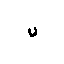

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 117  currChar: 98  Nextchar: 99 lineno: 6 charno:43
image is :


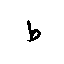

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 98  currChar: 99  Nextchar: 111 lineno: 6 charno:44
image is :


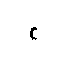

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 110 lineno: 6 charno:45
image is :


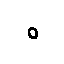

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 115 lineno: 6 charno:46
image is :


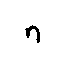

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 110  currChar: 115  Nextchar: 105 lineno: 6 charno:47
image is :


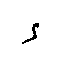

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 115  currChar: 105  Nextchar: 111 lineno: 6 charno:48
image is :


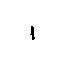

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 105  currChar: 111  Nextchar: 117 lineno: 6 charno:49
image is :


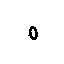

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 115 lineno: 6 charno:50
image is :


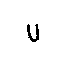

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 117  currChar: 115  Nextchar: 32 lineno: 6 charno:51
image is :


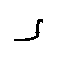

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 6 counted chars:44 actual chars: 44 lineno: 6 charno:52
------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 99
image is :


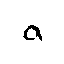

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 97  currChar: 99  Nextchar: 99 lineno: 7 charno:1
image is :


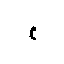

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 99  currChar: 99  Nextchar: 111 lineno: 7 charno:2
image is :


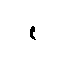

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 114 lineno: 7 charno:3
image is :


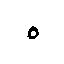

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 111  currChar: 114  Nextchar: 100 lineno: 7 charno:4
image is :


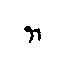

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 114  currChar: 100  Nextchar: 105 lineno: 7 charno:5
image is :


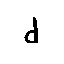

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 100  currChar: 105  Nextchar: 110 lineno: 7 charno:6
image is :


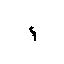

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 7 charno:7
image is :


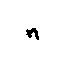

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 108 lineno: 7 charno:8
image is :


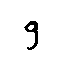

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 103  currChar: 108  Nextchar: 121 lineno: 7 charno:9
image is :


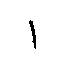

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 7 charno:10
image is :


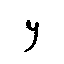

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 32  currChar: 101  Nextchar: 118 lineno: 7 charno:12
image is :


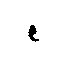

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 101  currChar: 118  Nextchar: 101 lineno: 7 charno:13
image is :


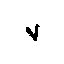

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 110 lineno: 7 charno:14
image is :


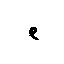

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 116 lineno: 7 charno:15
image is :


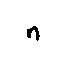

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 117 lineno: 7 charno:16
image is :


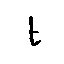

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 116  currChar: 117  Nextchar: 97 lineno: 7 charno:17
image is :


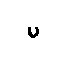

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 117  currChar: 97  Nextchar: 108 lineno: 7 charno:18
image is :


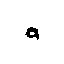

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 108 lineno: 7 charno:19
image is :


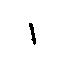

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 121 lineno: 7 charno:20
image is :


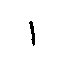

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 7 charno:21
image is :


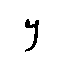

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 7 charno:23
image is :


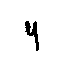

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 7 charno:24
image is :


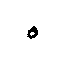

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 7 charno:25
image is :


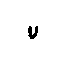

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 105 lineno: 7 charno:27
image is :


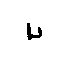

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 119  currChar: 105  Nextchar: 108 lineno: 7 charno:28
image is :


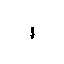

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 105  currChar: 108  Nextchar: 108 lineno: 7 charno:29
image is :


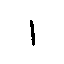

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 32 lineno: 7 charno:30
image is :


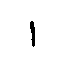

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 117 lineno: 7 charno:32
image is :


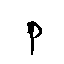

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 112  currChar: 117  Nextchar: 116 lineno: 7 charno:33
image is :


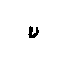

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 32 lineno: 7 charno:34
image is :


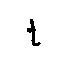

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 7 charno:36
image is :


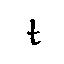

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 7 charno:37
image is :


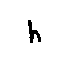

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 109 lineno: 7 charno:38
image is :


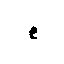

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 101  currChar: 109  Nextchar: 32 lineno: 7 charno:39
image is :


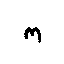

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 117 lineno: 7 charno:41
image is :


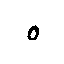

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 116 lineno: 7 charno:42
image is :


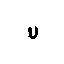

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 32 lineno: 7 charno:43
image is :


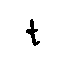

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 110 lineno: 7 charno:45
image is :


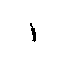

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 32 lineno: 7 charno:46
image is :


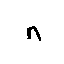

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 7 charno:48
image is :


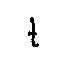

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 7 charno:49
image is :


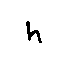

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 7 charno:50
image is :


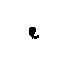

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 111 lineno: 7 charno:52
image is :


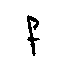

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 102  currChar: 111  Nextchar: 114 lineno: 7 charno:53
image is :


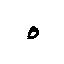

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 111  currChar: 114  Nextchar: 109 lineno: 7 charno:54
image is :


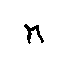

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 114  currChar: 109  Nextchar: 32 lineno: 7 charno:55
image is :


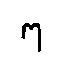

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 7 counted chars:47 actual chars: 47 lineno: 7 charno:56
------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102
image is :


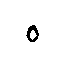

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 8 charno:1
image is :


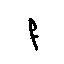

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 32  currChar: 100  Nextchar: 97 lineno: 8 charno:3
image is :


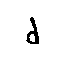

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 100  currChar: 97  Nextchar: 105 lineno: 8 charno:4
image is :


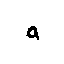

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 97  currChar: 105  Nextchar: 108 lineno: 8 charno:5
image is :


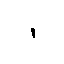

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 105  currChar: 108  Nextchar: 121 lineno: 8 charno:6
image is :


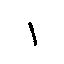

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 8 charno:7
image is :


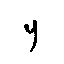

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 104 lineno: 8 charno:9
image is :


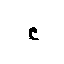

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 99  currChar: 104  Nextchar: 111 lineno: 8 charno:10
image is :


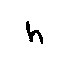

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 104  currChar: 111  Nextchar: 105 lineno: 8 charno:11
image is :


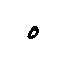

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 111  currChar: 105  Nextchar: 99 lineno: 8 charno:12
image is :


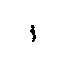

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 105  currChar: 99  Nextchar: 101 lineno: 8 charno:13
image is :


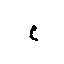

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 115 lineno: 8 charno:14
image is :


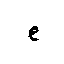

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 8 charno:15
image is :


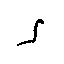

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 8 charno:17
image is :


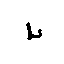

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 105 lineno: 8 charno:18
image is :


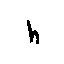

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 99 lineno: 8 charno:19
image is :


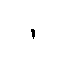

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 105  currChar: 99  Nextchar: 104 lineno: 8 charno:20
image is :


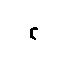

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 99  currChar: 104  Nextchar: 32 lineno: 8 charno:21
image is :


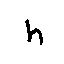

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 32  currChar: 117  Nextchar: 108 lineno: 8 charno:23
image is :


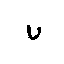

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 117  currChar: 108  Nextchar: 116 lineno: 8 charno:24
image is :


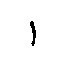

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 108  currChar: 116  Nextchar: 105 lineno: 8 charno:25
image is :


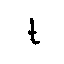

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 116  currChar: 105  Nextchar: 109 lineno: 8 charno:26
image is :


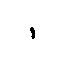

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 105  currChar: 109  Nextchar: 97 lineno: 8 charno:27
image is :


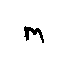

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 109  currChar: 97  Nextchar: 116 lineno: 8 charno:28
image is :


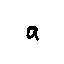

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 101 lineno: 8 charno:29
image is :


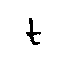

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 108 lineno: 8 charno:30
image is :


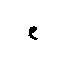

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 101  currChar: 108  Nextchar: 121 lineno: 8 charno:31
image is :


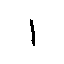

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 8 charno:32
image is :


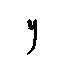

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 32  currChar: 100  Nextchar: 101 lineno: 8 charno:34
image is :


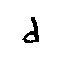

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 100  currChar: 101  Nextchar: 102 lineno: 8 charno:35
image is :


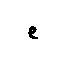

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 101  currChar: 102  Nextchar: 105 lineno: 8 charno:36
image is :


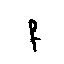

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 102  currChar: 105  Nextchar: 110 lineno: 8 charno:37
image is :


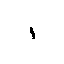

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 101 lineno: 8 charno:38
image is :


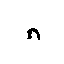

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 32 lineno: 8 charno:39
image is :


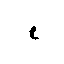

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 8 charno:41
image is :


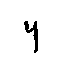

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 8 charno:42
image is :


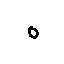

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 8 charno:43
image is :


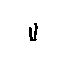

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 8 charno:44
image is :


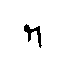

------------------------------------------------------------------------------------------------------------------------------------------------------
q
prevchar: 32  currChar: 113  Nextchar: 117 lineno: 8 charno:46
image is :


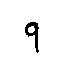

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 113  currChar: 117  Nextchar: 97 lineno: 8 charno:47
image is :


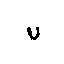

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 117  currChar: 97  Nextchar: 108 lineno: 8 charno:48
image is :


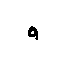

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 105 lineno: 8 charno:49
image is :


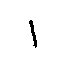

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 108  currChar: 105  Nextchar: 116 lineno: 8 charno:50
image is :


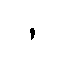

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 105  currChar: 116  Nextchar: 121 lineno: 8 charno:51
image is :


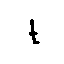

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 116  currChar: 121  Nextchar: 32 lineno: 8 charno:52
image is :


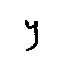

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 8 charno:54
image is :


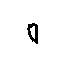

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 8 charno:55
image is :


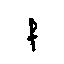

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 8 counted chars:48 actual chars: 48 lineno: 8 charno:56
------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 105
image is :


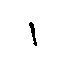

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 108  currChar: 105  Nextchar: 102 lineno: 9 charno:1
image is :


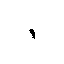

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 105  currChar: 102  Nextchar: 101 lineno: 9 charno:2
image is :


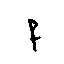

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 102  currChar: 101  Nextchar: 32 lineno: 9 charno:3
image is :


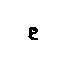

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 9 charno:5
image is :


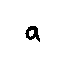

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 9 charno:6
image is :


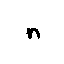

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 9 charno:7
image is :


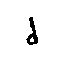

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 97 lineno: 9 charno:9
image is :


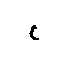

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 99  currChar: 97  Nextchar: 114 lineno: 9 charno:10
image is :


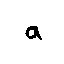

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 9 charno:11
image is :


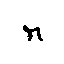

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 101 lineno: 9 charno:12
image is :


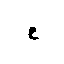

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 114 lineno: 9 charno:13
image is :


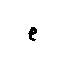

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 9 charno:14
image is :


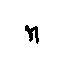

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32 lineno: 9 charno:16
image is :


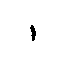

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 32  currChar: 104  Nextchar: 97 lineno: 9 charno:18
image is :


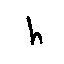

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 100 lineno: 9 charno:19
image is :


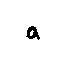

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 97  currChar: 100  Nextchar: 32 lineno: 9 charno:20
image is :


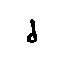

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 32 lineno: 9 charno:22
image is :


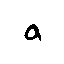

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 111 lineno: 9 charno:24
image is :


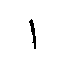

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 110 lineno: 9 charno:25
image is :


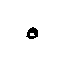

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 103 lineno: 9 charno:26
image is :


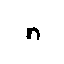

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 9 charno:27
image is :


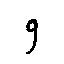

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 32  currChar: 114  Nextchar: 111 lineno: 9 charno:29
image is :


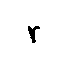

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 119 lineno: 9 charno:30
image is :


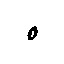

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 111  currChar: 119  Nextchar: 32 lineno: 9 charno:31
image is :


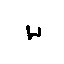

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 9 charno:33
image is :


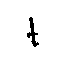

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 9 charno:34
image is :


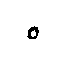

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 32  currChar: 104  Nextchar: 111 lineno: 9 charno:36
image is :


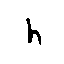

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 104  currChar: 111  Nextchar: 101 lineno: 9 charno:37
image is :


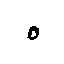

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 111  currChar: 101  Nextchar: 32 lineno: 9 charno:38
image is :


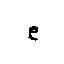

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 9 charno:40
image is :


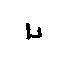

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 101 lineno: 9 charno:41
image is :


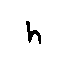

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 110 lineno: 9 charno:42
image is :


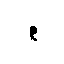

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 32 lineno: 9 charno:43
image is :


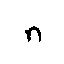

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32 lineno: 9 charno:45
image is :


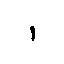

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 101 lineno: 9 charno:47
image is :


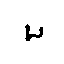

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 119  currChar: 101  Nextchar: 110 lineno: 9 charno:48
image is :


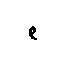

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 116 lineno: 9 charno:49
image is :


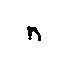

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 32 lineno: 9 charno:50
image is :


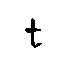

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 9 charno:52
image is :


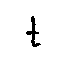

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 114 lineno: 9 charno:53
image is :


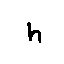

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 104  currChar: 114  Nextchar: 111 lineno: 9 charno:54
image is :


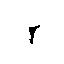

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 117 lineno: 9 charno:55
image is :


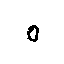

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 9 charno:56
image is :


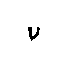

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 9 counted chars:44 actual chars: 44 lineno: 9 charno:57
------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 104
image is :


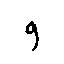

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 103  currChar: 104  Nextchar: 32 lineno: 10 charno:1
image is :


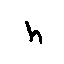

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 10 charno:3
image is :


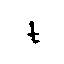

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 10 charno:4
image is :


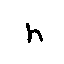

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 10 charno:5
image is :


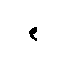

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 114 lineno: 10 charno:7
image is :


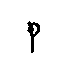

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 112  currChar: 114  Nextchar: 111 lineno: 10 charno:8
image is :


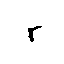

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 99 lineno: 10 charno:9
image is :


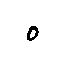

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 111  currChar: 99  Nextchar: 101 lineno: 10 charno:10
image is :


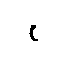

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 115 lineno: 10 charno:11
image is :


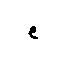

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 115 lineno: 10 charno:12
image is :


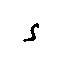

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 115  currChar: 115  Nextchar: 32 lineno: 10 charno:13
image is :


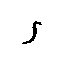

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 10 charno:15
image is :


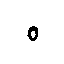

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 10 charno:16
image is :


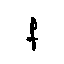

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 117 lineno: 10 charno:18
image is :


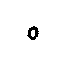

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 116 lineno: 10 charno:19
image is :


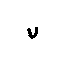

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 108 lineno: 10 charno:20
image is :


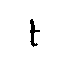

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 116  currChar: 108  Nextchar: 105 lineno: 10 charno:21
image is :


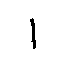

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 108  currChar: 105  Nextchar: 110 lineno: 10 charno:22
image is :


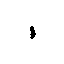

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 105 lineno: 10 charno:23
image is :


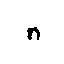

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 110  currChar: 105  Nextchar: 110 lineno: 10 charno:24
image is :


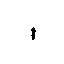

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 10 charno:25
image is :


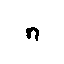

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 10 charno:26
image is :


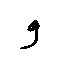

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 10 charno:28
image is :


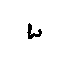

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 97 lineno: 10 charno:29
image is :


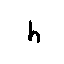

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 10 charno:30
image is :


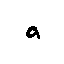

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 10 charno:31
image is :


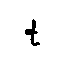

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 32  currChar: 107  Nextchar: 105 lineno: 10 charno:33
image is :


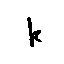

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 107  currChar: 105  Nextchar: 110 lineno: 10 charno:34
image is :


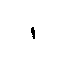

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 100 lineno: 10 charno:35
image is :


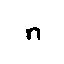

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 10 charno:36
image is :


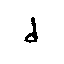

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 10 charno:38
image is :


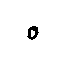

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 10 charno:39
image is :


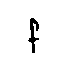

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 101 lineno: 10 charno:41
image is :


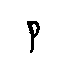

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 112  currChar: 101  Nextchar: 114 lineno: 10 charno:42
image is :


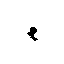

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 115 lineno: 10 charno:43
image is :


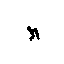

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 114  currChar: 115  Nextchar: 111 lineno: 10 charno:44
image is :


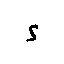

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 115  currChar: 111  Nextchar: 110 lineno: 10 charno:45
image is :


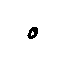

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 32 lineno: 10 charno:46
image is :


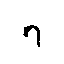

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32 lineno: 10 charno:48
image is :


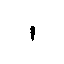

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 10 charno:50
image is :


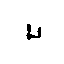

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 110 lineno: 10 charno:51
image is :


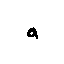

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 116 lineno: 10 charno:52
image is :


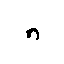

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 101 lineno: 10 charno:53
image is :


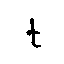

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 100 lineno: 10 charno:54
image is :


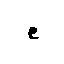

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 10 charno:55
image is :


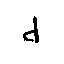

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 10 counted chars:46 actual chars: 46 lineno: 10 charno:56
------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111
image is :


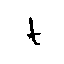

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 11 charno:1
image is :


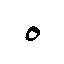

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 101 lineno: 11 charno:3
image is :


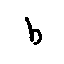

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 98  currChar: 101  Nextchar: 99 lineno: 11 charno:4
image is :


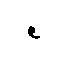

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 101  currChar: 99  Nextchar: 111 lineno: 11 charno:5
image is :


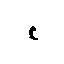

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 109 lineno: 11 charno:6
image is :


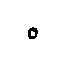

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 101 lineno: 11 charno:7
image is :


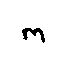

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 109  currChar: 101  Nextchar: 32 lineno: 11 charno:8
image is :


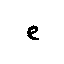

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32 lineno: 11 charno:10
image is :


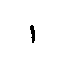

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 11 charno:12
image is :


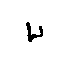

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 115 lineno: 11 charno:13
image is :


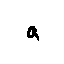

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 11 charno:14
image is :


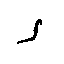

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 102 lineno: 11 charno:16
image is :


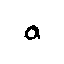

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 97  currChar: 102  Nextchar: 116 lineno: 11 charno:17
image is :


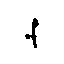

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 102  currChar: 116  Nextchar: 101 lineno: 11 charno:18
image is :


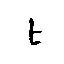

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 114 lineno: 11 charno:19
image is :


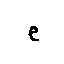

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 11 charno:20
image is :


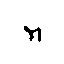

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 108 lineno: 11 charno:22
image is :


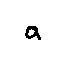

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 108 lineno: 11 charno:23
image is :


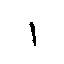

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 32 lineno: 11 charno:24
image is :


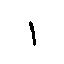

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 32 lineno: 11 charno:26
image is :


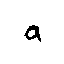

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 97 lineno: 11 charno:28
image is :


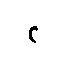

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 99  currChar: 97  Nextchar: 114 lineno: 11 charno:29
image is :


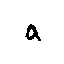

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 11 charno:30
image is :


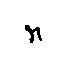

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 101 lineno: 11 charno:31
image is :


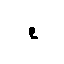

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 114 lineno: 11 charno:32
image is :


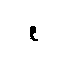

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 11 charno:33
image is :


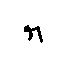

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 114 lineno: 11 charno:35
image is :


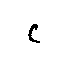

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 99  currChar: 114  Nextchar: 105 lineno: 11 charno:36
image is :


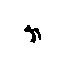

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 109 lineno: 11 charno:37
image is :


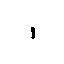

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 105  currChar: 109  Nextchar: 105 lineno: 11 charno:38
image is :


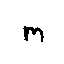

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 109  currChar: 105  Nextchar: 110 lineno: 11 charno:39
image is :


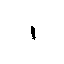

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 97 lineno: 11 charno:40
image is :


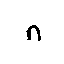

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 110  currChar: 97  Nextchar: 108 lineno: 11 charno:41
image is :


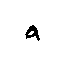

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 32 lineno: 11 charno:42
image is :


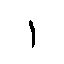

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 32  currChar: 110  Nextchar: 101 lineno: 11 charno:44
image is :


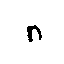

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 118 lineno: 11 charno:45
image is :


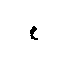

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 101  currChar: 118  Nextchar: 101 lineno: 11 charno:46
image is :


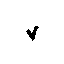

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 114 lineno: 11 charno:47
image is :


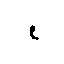

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 116 lineno: 11 charno:48
image is :


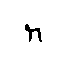

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 114  currChar: 116  Nextchar: 104 lineno: 11 charno:49
image is :


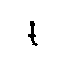

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 32 lineno: 11 charno:50
image is :


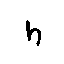

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 11 counted chars:42 actual chars: 42 lineno: 11 charno:51
------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32
image is :


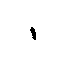

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 111 lineno: 12 charno:2
image is :


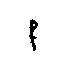

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 102  currChar: 111  Nextchar: 108 lineno: 12 charno:3
image is :


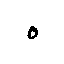

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 111  currChar: 108  Nextchar: 108 lineno: 12 charno:4
image is :


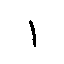

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 111 lineno: 12 charno:5
image is :


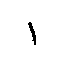

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 119 lineno: 12 charno:6
image is :


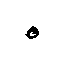

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 111  currChar: 119  Nextchar: 101 lineno: 12 charno:7
image is :


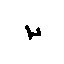

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 119  currChar: 101  Nextchar: 100 lineno: 12 charno:8
image is :


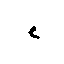

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 12 charno:9
image is :


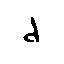

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 12 charno:11
image is :


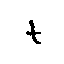

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 12 charno:12
image is :


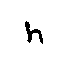

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 12 charno:13
image is :


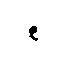

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 100 lineno: 12 charno:15
image is :


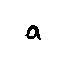

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 97  currChar: 100  Nextchar: 118 lineno: 12 charno:16
image is :


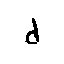

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 100  currChar: 118  Nextchar: 105 lineno: 12 charno:17
image is :


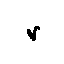

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 118  currChar: 105  Nextchar: 99 lineno: 12 charno:18
image is :


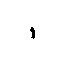

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 105  currChar: 99  Nextchar: 101 lineno: 12 charno:19
image is :


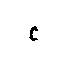

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 32 lineno: 12 charno:20
image is :


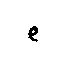

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 117 lineno: 12 charno:22
image is :


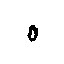

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 116 lineno: 12 charno:23
image is :


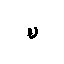

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 108 lineno: 12 charno:24
image is :


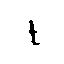

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 116  currChar: 108  Nextchar: 105 lineno: 12 charno:25
image is :


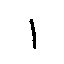

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 108  currChar: 105  Nextchar: 110 lineno: 12 charno:26
image is :


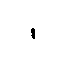

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 101 lineno: 12 charno:27
image is :


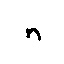

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 100 lineno: 12 charno:28
image is :


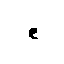

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 12 charno:29
image is :


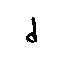

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 110 lineno: 12 charno:31
image is :


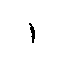

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 32 lineno: 12 charno:32
image is :


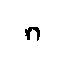

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 111 lineno: 12 charno:34
image is :


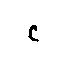

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 110 lineno: 12 charno:35
image is :


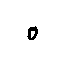

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 118 lineno: 12 charno:36
image is :


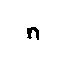

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 110  currChar: 118  Nextchar: 101 lineno: 12 charno:37
image is :


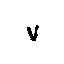

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 121 lineno: 12 charno:38
image is :


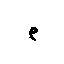

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 101  currChar: 121  Nextchar: 115 lineno: 12 charno:39
image is :


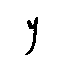

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 121  currChar: 115  Nextchar: 32 lineno: 12 charno:40
image is :


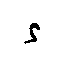

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 111 lineno: 12 charno:42
image is :


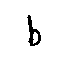

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 98  currChar: 111  Nextchar: 111 lineno: 12 charno:43
image is :


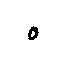

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 111  currChar: 111  Nextchar: 107 lineno: 12 charno:44
image is :


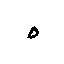

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 111  currChar: 107  Nextchar: 32 lineno: 12 charno:45
image is :


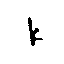

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 12 charno:47
image is :


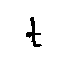

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 12 charno:48
image is :


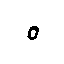

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 101 lineno: 12 charno:50
image is :


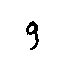

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 103  currChar: 101  Nextchar: 116 lineno: 12 charno:51
image is :


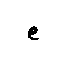

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 101  currChar: 116  Nextchar: 32 lineno: 12 charno:52
image is :


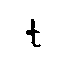

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 32 lineno: 12 charno:54
image is :


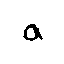

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 12 counted chars:45 actual chars: 45 lineno: 12 charno:55
------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 108
image is :


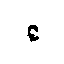

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 99  currChar: 108  Nextchar: 101 lineno: 13 charno:1
image is :


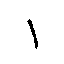

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 108  currChar: 101  Nextchar: 97 lineno: 13 charno:2
image is :


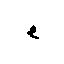

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 101  currChar: 97  Nextchar: 114 lineno: 13 charno:3
image is :


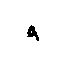

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 32 lineno: 13 charno:4
image is :


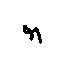

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 105 lineno: 13 charno:6
image is :


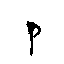

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 112  currChar: 105  Nextchar: 99 lineno: 13 charno:7
image is :


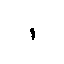

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 105  currChar: 99  Nextchar: 116 lineno: 13 charno:8
image is :


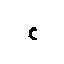

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 99  currChar: 116  Nextchar: 117 lineno: 13 charno:9
image is :


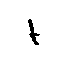

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 116  currChar: 117  Nextchar: 114 lineno: 13 charno:10
image is :


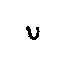

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 101 lineno: 13 charno:11
image is :


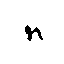

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 13 charno:12
image is :


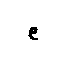

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 13 charno:14
image is :


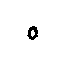

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 13 charno:15
image is :


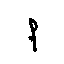

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 13 charno:17
image is :


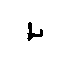

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 97 lineno: 13 charno:18
image is :


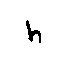

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 13 charno:19
image is :


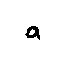

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 13 charno:20
image is :


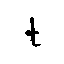

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 32 lineno: 13 charno:22
image is :


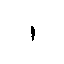

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 13 charno:24
image is :


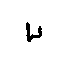

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 110 lineno: 13 charno:25
image is :


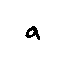

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 116 lineno: 13 charno:26
image is :


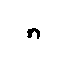

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 101 lineno: 13 charno:27
image is :


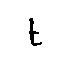

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 100 lineno: 13 charno:28
image is :


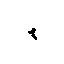

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 13 charno:29
image is :


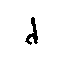

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 13 charno:31
image is :


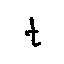

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 13 charno:32
image is :


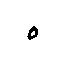

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 101 lineno: 13 charno:34
image is :


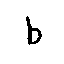

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 98  currChar: 101  Nextchar: 99 lineno: 13 charno:35
image is :


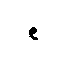

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 101  currChar: 99  Nextchar: 111 lineno: 13 charno:36
image is :


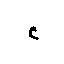

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 109 lineno: 13 charno:37
image is :


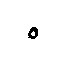

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 101 lineno: 13 charno:38
image is :


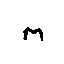

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 109  currChar: 101  Nextchar: 32 lineno: 13 charno:39
image is :


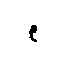

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 111 lineno: 13 charno:41
image is :


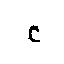

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 99  currChar: 111  Nextchar: 110 lineno: 13 charno:42
image is :


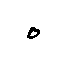

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 115 lineno: 13 charno:43
image is :


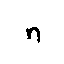

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 110  currChar: 115  Nextchar: 105 lineno: 13 charno:44
image is :


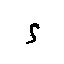

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 115  currChar: 105  Nextchar: 100 lineno: 13 charno:45
image is :


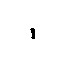

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 105  currChar: 100  Nextchar: 101 lineno: 13 charno:46
image is :


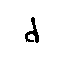

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 100  currChar: 101  Nextchar: 114 lineno: 13 charno:47
image is :


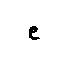

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 13 charno:48
image is :


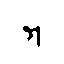

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 13 charno:50
image is :


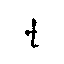

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 13 charno:51
image is :


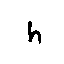

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 13 charno:52
image is :


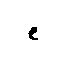

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 13 counted chars:44 actual chars: 44 lineno: 13 charno:53
------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 111
image is :


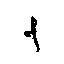

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 102  currChar: 111  Nextchar: 108 lineno: 14 charno:1
image is :


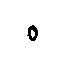

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 111  currChar: 108  Nextchar: 108 lineno: 14 charno:2
image is :


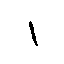

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 111 lineno: 14 charno:3
image is :


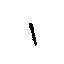

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 119 lineno: 14 charno:4
image is :


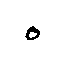

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 111  currChar: 119  Nextchar: 105 lineno: 14 charno:5
image is :


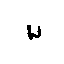

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 119  currChar: 105  Nextchar: 110 lineno: 14 charno:6
image is :


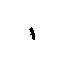

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 14 charno:7
image is :


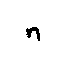

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 14 charno:8
image is :


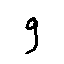

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 32  currChar: 101  Nextchar: 120 lineno: 14 charno:10
image is :


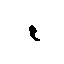

------------------------------------------------------------------------------------------------------------------------------------------------------
x
prevchar: 101  currChar: 120  Nextchar: 101 lineno: 14 charno:11
image is :


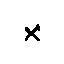

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 120  currChar: 101  Nextchar: 114 lineno: 14 charno:12
image is :


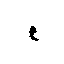

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 99 lineno: 14 charno:13
image is :


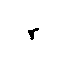

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 114  currChar: 99  Nextchar: 105 lineno: 14 charno:14
image is :


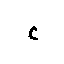

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 99  currChar: 105  Nextchar: 115 lineno: 14 charno:15
image is :


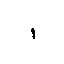

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 101 lineno: 14 charno:16
image is :


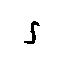

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 115  currChar: 101  Nextchar: 32 lineno: 14 charno:17
image is :


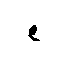

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 14 charno:19
image is :


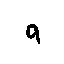

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 14 charno:20
image is :


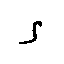

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 14 charno:22
image is :


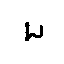

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 121 lineno: 14 charno:23
image is :


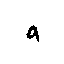

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 97  currChar: 121  Nextchar: 32 lineno: 14 charno:24
image is :


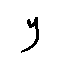

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 14 charno:26
image is :


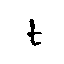

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 14 charno:27
image is :


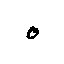

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 32  currChar: 104  Nextchar: 101 lineno: 14 charno:29
image is :


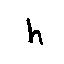

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 108 lineno: 14 charno:30
image is :


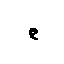

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 101  currChar: 108  Nextchar: 112 lineno: 14 charno:31
image is :


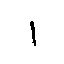

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 108  currChar: 112  Nextchar: 32 lineno: 14 charno:32
image is :


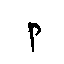

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 14 charno:34
image is :


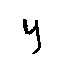

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 14 charno:35
image is :


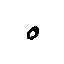

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 14 charno:36
image is :


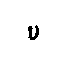

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 105 lineno: 14 charno:38
image is :


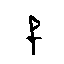

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 102  currChar: 105  Nextchar: 103 lineno: 14 charno:39
image is :


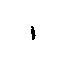

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 105  currChar: 103  Nextchar: 117 lineno: 14 charno:40
image is :


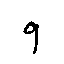

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 103  currChar: 117  Nextchar: 114 lineno: 14 charno:41
image is :


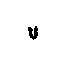

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 101 lineno: 14 charno:42
image is :


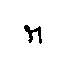

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 14 charno:43
image is :


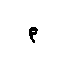

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 14 charno:45
image is :


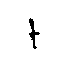

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 105 lineno: 14 charno:46
image is :


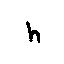

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 115 lineno: 14 charno:47
image is :


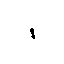

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 14 charno:48
image is :


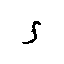

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 117 lineno: 14 charno:50
image is :


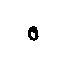

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 116 lineno: 14 charno:51
image is :


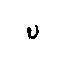

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 32 lineno: 14 charno:52
image is :


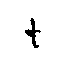

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 14 counted chars:44 actual chars: 44 lineno: 14 charno:53
------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 109
image is :


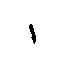

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 105  currChar: 109  Nextchar: 97 lineno: 15 charno:1
image is :


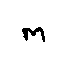

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 109  currChar: 97  Nextchar: 103 lineno: 15 charno:2
image is :


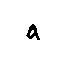

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 97  currChar: 103  Nextchar: 105 lineno: 15 charno:3
image is :


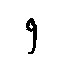

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 103  currChar: 105  Nextchar: 110 lineno: 15 charno:4
image is :


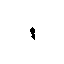

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 101 lineno: 15 charno:5
image is :


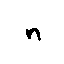

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 32 lineno: 15 charno:6
image is :


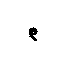

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 15 charno:8
image is :


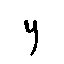

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 15 charno:9
image is :


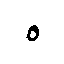

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 15 charno:10
image is :


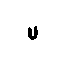

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 115 lineno: 15 charno:11
image is :


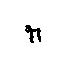

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 114  currChar: 115  Nextchar: 101 lineno: 15 charno:12
image is :


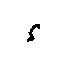

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 115  currChar: 101  Nextchar: 108 lineno: 15 charno:13
image is :


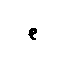

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 101  currChar: 108  Nextchar: 102 lineno: 15 charno:14
image is :


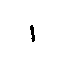

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 108  currChar: 102  Nextchar: 32 lineno: 15 charno:15
image is :


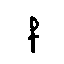

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 116 lineno: 15 charno:17
image is :


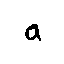

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 116 lineno: 15 charno:18
image is :


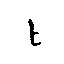

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 116  currChar: 116  Nextchar: 101 lineno: 15 charno:19
image is :


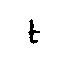

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 110 lineno: 15 charno:20
image is :


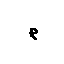

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 100 lineno: 15 charno:21
image is :


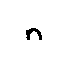

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 105 lineno: 15 charno:22
image is :


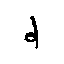

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 100  currChar: 105  Nextchar: 110 lineno: 15 charno:23
image is :


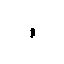

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 15 charno:24
image is :


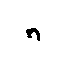

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 15 charno:25
image is :


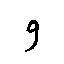

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 15 charno:27
image is :


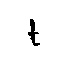

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 15 charno:28
image is :


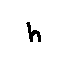

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 15 charno:29
image is :


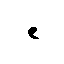

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 117 lineno: 15 charno:31
image is :


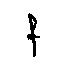

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 102  currChar: 117  Nextchar: 110 lineno: 15 charno:32
image is :


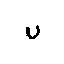

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 117  currChar: 110  Nextchar: 101 lineno: 15 charno:33
image is :


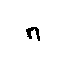

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 114 lineno: 15 charno:34
image is :


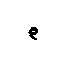

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 97 lineno: 15 charno:35
image is :


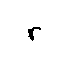

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 114  currChar: 97  Nextchar: 108 lineno: 15 charno:36
image is :


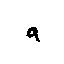

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 32 lineno: 15 charno:37
image is :


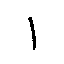

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 15 charno:39
image is :


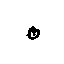

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 15 charno:40
image is :


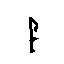

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 111 lineno: 15 charno:42
image is :


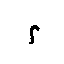

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 115  currChar: 111  Nextchar: 109 lineno: 15 charno:43
image is :


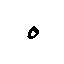

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 101 lineno: 15 charno:44
image is :


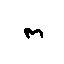

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 109  currChar: 101  Nextchar: 111 lineno: 15 charno:45
image is :


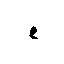

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 101  currChar: 111  Nextchar: 110 lineno: 15 charno:46
image is :


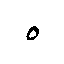

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 101 lineno: 15 charno:47
image is :


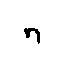

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 32 lineno: 15 charno:48
image is :


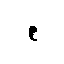

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 15 counted chars:43 actual chars: 43 lineno: 15 charno:49
------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104
image is :


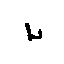

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 111 lineno: 16 charno:1
image is :


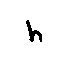

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 104  currChar: 111  Nextchar: 32 lineno: 16 charno:2
image is :


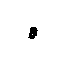

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 115 lineno: 16 charno:4
image is :


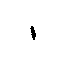

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 16 charno:5
image is :


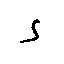

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 101 lineno: 16 charno:7
image is :


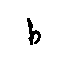

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 98  currChar: 101  Nextchar: 108 lineno: 16 charno:8
image is :


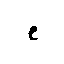

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 101  currChar: 108  Nextchar: 111 lineno: 16 charno:9
image is :


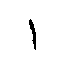

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 118 lineno: 16 charno:10
image is :


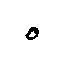

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 111  currChar: 118  Nextchar: 101 lineno: 16 charno:11
image is :


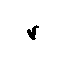

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 100 lineno: 16 charno:12
image is :


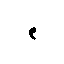

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 16 charno:13
image is :


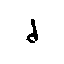

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 121 lineno: 16 charno:15
image is :


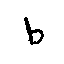

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 98  currChar: 121  Nextchar: 32 lineno: 16 charno:16
image is :


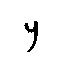

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 108 lineno: 16 charno:18
image is :


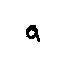

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 108 lineno: 16 charno:19
image is :


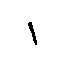

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 108  currChar: 108  Nextchar: 32 lineno: 16 charno:20
image is :


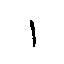

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 16 charno:22
image is :


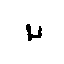

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 111 lineno: 16 charno:23
image is :


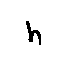

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 104  currChar: 111  Nextchar: 32 lineno: 16 charno:24
image is :


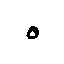

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 32  currChar: 107  Nextchar: 110 lineno: 16 charno:26
image is :


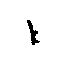

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 107  currChar: 110  Nextchar: 111 lineno: 16 charno:27
image is :


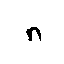

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 110  currChar: 111  Nextchar: 119 lineno: 16 charno:28
image is :


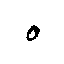

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 111  currChar: 119  Nextchar: 32 lineno: 16 charno:29
image is :


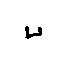

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 32  currChar: 104  Nextchar: 105 lineno: 16 charno:31
image is :


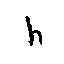

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 109 lineno: 16 charno:32
image is :


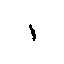

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 105  currChar: 109  Nextchar: 32 lineno: 16 charno:33
image is :


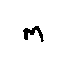

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 16 charno:35
image is :


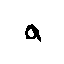

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 16 charno:36
image is :


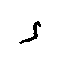

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 16 charno:38
image is :


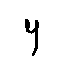

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 16 charno:39
image is :


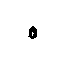

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 16 charno:40
image is :


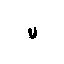

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 32  currChar: 101  Nextchar: 110 lineno: 16 charno:42
image is :


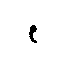

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 116 lineno: 16 charno:43
image is :


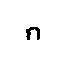

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 101 lineno: 16 charno:44
image is :


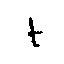

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 114 lineno: 16 charno:45
image is :


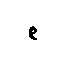

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 32 lineno: 16 charno:46
image is :


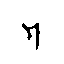

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 16 charno:48
image is :


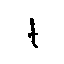

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 16 charno:49
image is :


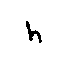

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 16 charno:50
image is :


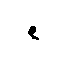

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 16 counted chars:40 actual chars: 40 lineno: 16 charno:51
------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 32  currChar: 114  Nextchar: 111
image is :


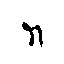

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 111 lineno: 17 charno:1
image is :


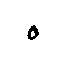

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 111  currChar: 111  Nextchar: 109 lineno: 17 charno:2
image is :


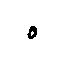

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 111  currChar: 109  Nextchar: 32 lineno: 17 charno:3
image is :


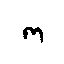

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 17 charno:5
image is :


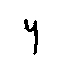

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 17 charno:6
image is :


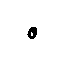

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 17 charno:7
image is :


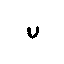

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 101 lineno: 17 charno:9
image is :


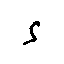

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 115  currChar: 101  Nextchar: 101 lineno: 17 charno:10
image is :


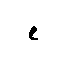

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 32 lineno: 17 charno:11
image is :


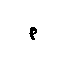

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 17 charno:13
image is :


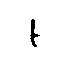

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 17 charno:14
image is :


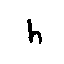

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 17 charno:15
image is :


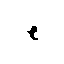

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 97 lineno: 17 charno:17
image is :


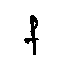

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 102  currChar: 97  Nextchar: 99 lineno: 17 charno:18
image is :


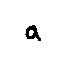

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 97  currChar: 99  Nextchar: 101 lineno: 17 charno:19
image is :


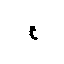

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 99  currChar: 101  Nextchar: 115 lineno: 17 charno:20
image is :


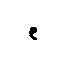

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 17 charno:21
image is :


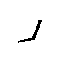

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 17 charno:23
image is :


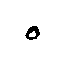

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 17 charno:24
image is :


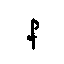

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 32  currChar: 104  Nextchar: 105 lineno: 17 charno:26
image is :


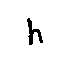

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 115 lineno: 17 charno:27
image is :


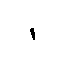

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 17 charno:28
image is :


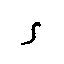

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 32  currChar: 103  Nextchar: 114 lineno: 17 charno:30
image is :


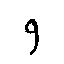

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 103  currChar: 114  Nextchar: 105 lineno: 17 charno:31
image is :


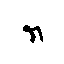

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 101 lineno: 17 charno:32
image is :


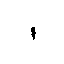

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 105  currChar: 101  Nextchar: 118 lineno: 17 charno:33
image is :


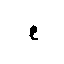

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 101  currChar: 118  Nextchar: 105 lineno: 17 charno:34
image is :


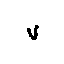

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 118  currChar: 105  Nextchar: 110 lineno: 17 charno:35
image is :


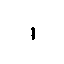

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 17 charno:36
image is :


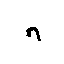

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 17 charno:37
image is :


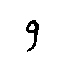

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 114 lineno: 17 charno:39
image is :


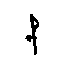

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 102  currChar: 114  Nextchar: 105 lineno: 17 charno:40
image is :


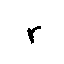

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 101 lineno: 17 charno:41
image is :


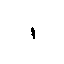

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 105  currChar: 101  Nextchar: 110 lineno: 17 charno:42
image is :


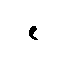

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 100 lineno: 17 charno:43
image is :


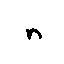

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 115 lineno: 17 charno:44
image is :


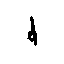

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 100  currChar: 115  Nextchar: 32 lineno: 17 charno:45
image is :


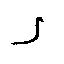

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 17 charno:47
image is :


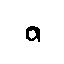

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 17 charno:48
image is :


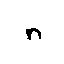

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 17 charno:49
image is :


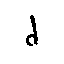

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 17 counted chars:41 actual chars: 41 lineno: 17 charno:50
------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 111
image is :


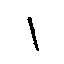

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 118 lineno: 18 charno:1
image is :


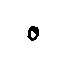

------------------------------------------------------------------------------------------------------------------------------------------------------
v
prevchar: 111  currChar: 118  Nextchar: 101 lineno: 18 charno:2
image is :


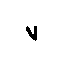

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 118  currChar: 101  Nextchar: 100 lineno: 18 charno:3
image is :


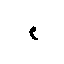

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 18 charno:4
image is :


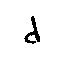

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 110 lineno: 18 charno:6
image is :


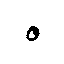

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 111  currChar: 110  Nextchar: 101 lineno: 18 charno:7
image is :


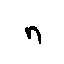

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 115 lineno: 18 charno:8
image is :


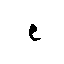

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 18 charno:9
image is :


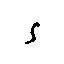

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 18 charno:11
image is :


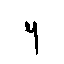

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 18 charno:12
image is :


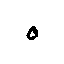

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 18 charno:13
image is :


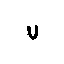

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 112 lineno: 18 charno:15
image is :


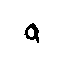

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 97  currChar: 112  Nextchar: 112 lineno: 18 charno:16
image is :


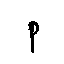

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 112  currChar: 112  Nextchar: 114 lineno: 18 charno:17
image is :


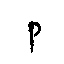

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 112  currChar: 114  Nextchar: 111 lineno: 18 charno:18
image is :


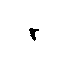

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 97 lineno: 18 charno:19
image is :


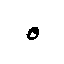

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 111  currChar: 97  Nextchar: 99 lineno: 18 charno:20
image is :


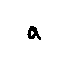

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 97  currChar: 99  Nextchar: 104 lineno: 18 charno:21
image is :


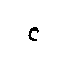

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 99  currChar: 104  Nextchar: 32 lineno: 18 charno:22
image is :


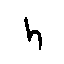

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 18 charno:24
image is :


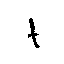

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 18 charno:25
image is :


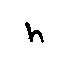

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 18 charno:26
image is :


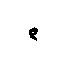

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 32  currChar: 99  Nextchar: 97 lineno: 18 charno:28
image is :


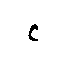

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 99  currChar: 97  Nextchar: 115 lineno: 18 charno:29
image is :


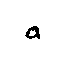

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 107 lineno: 18 charno:30
image is :


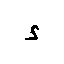

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 115  currChar: 107  Nextchar: 101 lineno: 18 charno:31
image is :


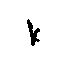

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 107  currChar: 101  Nextchar: 116 lineno: 18 charno:32
image is :


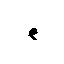

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 101  currChar: 116  Nextchar: 32 lineno: 18 charno:33
image is :


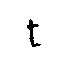

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 18 charno:35
image is :


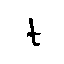

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 18 charno:36
image is :


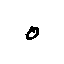

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 32  currChar: 112  Nextchar: 97 lineno: 18 charno:38
image is :


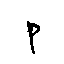

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 112  currChar: 97  Nextchar: 121 lineno: 18 charno:39
image is :


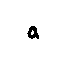

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 97  currChar: 121  Nextchar: 32 lineno: 18 charno:40
image is :


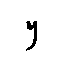

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 18 charno:42
image is :


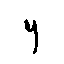

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 18 charno:43
image is :


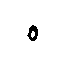

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 18 charno:44
image is :


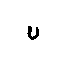

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 18 charno:45
image is :


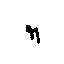

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 105 lineno: 18 charno:47
image is :


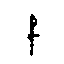

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 102  currChar: 105  Nextchar: 110 lineno: 18 charno:48
image is :


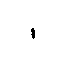

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 97 lineno: 18 charno:49
image is :


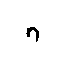

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 110  currChar: 97  Nextchar: 108 lineno: 18 charno:50
image is :


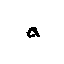

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 32 lineno: 18 charno:51
image is :


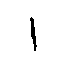

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 18 counted chars:43 actual chars: 43 lineno: 18 charno:52
------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 32  currChar: 114  Nextchar: 101
image is :


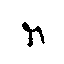

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 115 lineno: 19 charno:1
image is :


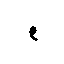

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 112 lineno: 19 charno:2
image is :


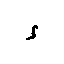

------------------------------------------------------------------------------------------------------------------------------------------------------
p
prevchar: 115  currChar: 112  Nextchar: 101 lineno: 19 charno:3
image is :


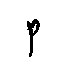

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 112  currChar: 101  Nextchar: 99 lineno: 19 charno:4
image is :


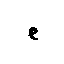

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 101  currChar: 99  Nextchar: 116 lineno: 19 charno:5
image is :


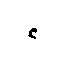

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 99  currChar: 116  Nextchar: 115 lineno: 19 charno:6
image is :


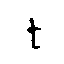

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 116  currChar: 115  Nextchar: 32 lineno: 19 charno:7
image is :


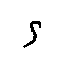

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110 lineno: 19 charno:9
image is :


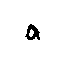

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 19 charno:10
image is :


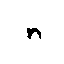

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 19 charno:11
image is :


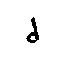

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 19 charno:13
image is :


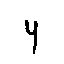

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 19 charno:14
image is :


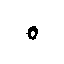

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 19 charno:15
image is :


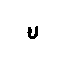

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 114 lineno: 19 charno:17
image is :


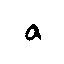

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 101 lineno: 19 charno:18
image is :


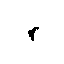

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 114  currChar: 101  Nextchar: 32 lineno: 19 charno:19
image is :


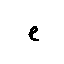

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 116 lineno: 19 charno:21
image is :


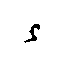

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 115  currChar: 116  Nextchar: 97 lineno: 19 charno:22
image is :


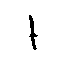

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 116  currChar: 97  Nextchar: 114 lineno: 19 charno:23
image is :


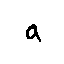

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 116 lineno: 19 charno:24
image is :


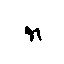

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 114  currChar: 116  Nextchar: 108 lineno: 19 charno:25
image is :


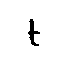

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 116  currChar: 108  Nextchar: 101 lineno: 19 charno:26
image is :


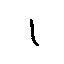

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 108  currChar: 101  Nextchar: 100 lineno: 19 charno:27
image is :


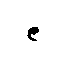

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 101  currChar: 100  Nextchar: 32 lineno: 19 charno:28
image is :


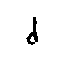

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 19 charno:30
image is :


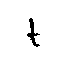

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 19 charno:31
image is :


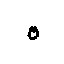

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 101 lineno: 19 charno:33
image is :


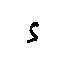

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 115  currChar: 101  Nextchar: 101 lineno: 19 charno:34
image is :


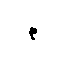

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 101  currChar: 101  Nextchar: 32 lineno: 19 charno:35
image is :


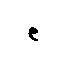

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 116 lineno: 19 charno:37
image is :


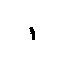

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 105  currChar: 116  Nextchar: 32 lineno: 19 charno:38
image is :


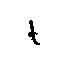

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 115 lineno: 19 charno:40
image is :


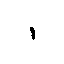

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 19 charno:41
image is :


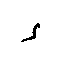

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 19 charno:43
image is :


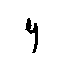

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 19 charno:44
image is :


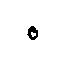

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 19 charno:45
image is :


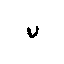

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 121 lineno: 19 charno:47
image is :


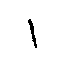

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 105 lineno: 19 charno:48
image is :


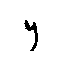

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 121  currChar: 105  Nextchar: 110 lineno: 19 charno:49
image is :


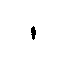

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 103 lineno: 19 charno:50
image is :


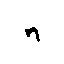

------------------------------------------------------------------------------------------------------------------------------------------------------
g
prevchar: 110  currChar: 103  Nextchar: 32 lineno: 19 charno:51
image is :


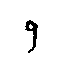

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 19 counted chars:42 actual chars: 42 lineno: 19 charno:52
------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 110
image is :


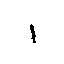

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 32 lineno: 20 charno:1
image is :


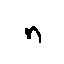

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 116 lineno: 20 charno:3
image is :


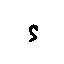

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 115  currChar: 116  Nextchar: 97 lineno: 20 charno:4
image is :


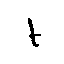

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 116  currChar: 97  Nextchar: 116 lineno: 20 charno:5
image is :


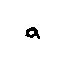

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 101 lineno: 20 charno:6
image is :


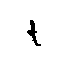

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 32 lineno: 20 charno:7
image is :


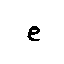

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 20 charno:9
image is :


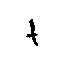

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 105 lineno: 20 charno:10
image is :


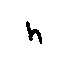

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 115 lineno: 20 charno:11
image is :


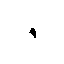

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 20 charno:12
image is :


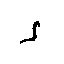

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 32  currChar: 105  Nextchar: 115 lineno: 20 charno:14
image is :


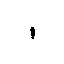

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 105  currChar: 115  Nextchar: 32 lineno: 20 charno:15
image is :


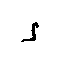

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 20 charno:17
image is :


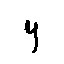

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 20 charno:18
image is :


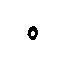

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 20 charno:19
image is :


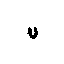

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 20 charno:20
image is :


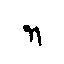

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 117 lineno: 20 charno:22
image is :


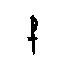

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 102  currChar: 117  Nextchar: 110 lineno: 20 charno:23
image is :


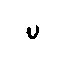

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 117  currChar: 110  Nextchar: 101 lineno: 20 charno:24
image is :


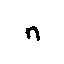

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 114 lineno: 20 charno:25
image is :


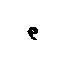

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 97 lineno: 20 charno:26
image is :


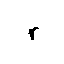

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 114  currChar: 97  Nextchar: 108 lineno: 20 charno:27
image is :


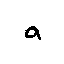

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 97  currChar: 108  Nextchar: 32 lineno: 20 charno:28
image is :


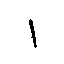

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 20 charno:30
image is :


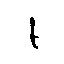

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 105 lineno: 20 charno:31
image is :


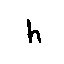

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 104  currChar: 105  Nextchar: 110 lineno: 20 charno:32
image is :


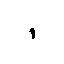

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 107 lineno: 20 charno:33
image is :


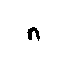

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 110  currChar: 107  Nextchar: 32 lineno: 20 charno:34
image is :


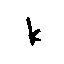

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 98 lineno: 20 charno:36
image is :


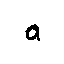

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 97  currChar: 98  Nextchar: 111 lineno: 20 charno:37
image is :


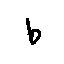

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 98  currChar: 111  Nextchar: 117 lineno: 20 charno:38
image is :


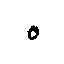

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 116 lineno: 20 charno:39
image is :


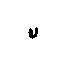

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 117  currChar: 116  Nextchar: 32 lineno: 20 charno:40
image is :


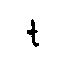

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 104 lineno: 20 charno:42
image is :


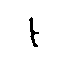

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 116  currChar: 104  Nextchar: 101 lineno: 20 charno:43
image is :


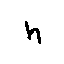

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 104  currChar: 101  Nextchar: 32 lineno: 20 charno:44
image is :


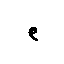

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 104 lineno: 20 charno:46
image is :


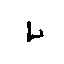

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 119  currChar: 104  Nextchar: 97 lineno: 20 charno:47
image is :


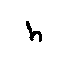

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 104  currChar: 97  Nextchar: 116 lineno: 20 charno:48
image is :


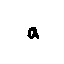

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 32 lineno: 20 charno:49
image is :


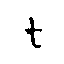

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 20 counted chars:41 actual chars: 41 lineno: 20 charno:50
------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111
image is :


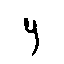

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 21 charno:1
image is :


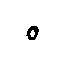

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 21 charno:2
image is :


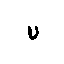

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 111 lineno: 21 charno:4
image is :


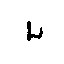

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 119  currChar: 111  Nextchar: 117 lineno: 21 charno:5
image is :


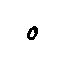

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 108 lineno: 21 charno:6
image is :


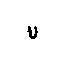

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 117  currChar: 108  Nextchar: 100 lineno: 21 charno:7
image is :


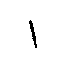

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 108  currChar: 100  Nextchar: 32 lineno: 21 charno:8
image is :


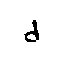

------------------------------------------------------------------------------------------------------------------------------------------------------
w
prevchar: 32  currChar: 119  Nextchar: 97 lineno: 21 charno:10
image is :


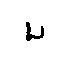

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 119  currChar: 97  Nextchar: 110 lineno: 21 charno:11
image is :


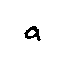

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 116 lineno: 21 charno:12
image is :


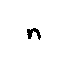

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 110  currChar: 116  Nextchar: 32 lineno: 21 charno:13
image is :


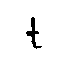

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 32  currChar: 101  Nextchar: 97 lineno: 21 charno:15
image is :


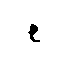

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 101  currChar: 97  Nextchar: 99 lineno: 21 charno:16
image is :


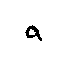

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 97  currChar: 99  Nextchar: 104 lineno: 21 charno:17
image is :


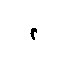

------------------------------------------------------------------------------------------------------------------------------------------------------
h
prevchar: 99  currChar: 104  Nextchar: 32 lineno: 21 charno:18
image is :


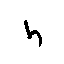

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 32  currChar: 111  Nextchar: 102 lineno: 21 charno:20
image is :


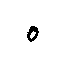

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 111  currChar: 102  Nextchar: 32 lineno: 21 charno:21
image is :


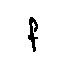

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 21 charno:23
image is :


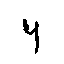

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 21 charno:24
image is :


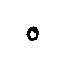

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 114 lineno: 21 charno:25
image is :


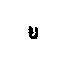

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 117  currChar: 114  Nextchar: 32 lineno: 21 charno:26
image is :


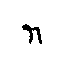

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 114 lineno: 21 charno:28
image is :


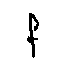

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 102  currChar: 114  Nextchar: 105 lineno: 21 charno:29
image is :


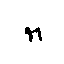

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 114  currChar: 105  Nextchar: 101 lineno: 21 charno:30
image is :


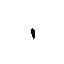

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 105  currChar: 101  Nextchar: 110 lineno: 21 charno:31
image is :


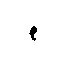

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 101  currChar: 110  Nextchar: 100 lineno: 21 charno:32
image is :


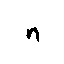

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 115 lineno: 21 charno:33
image is :


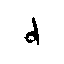

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 100  currChar: 115  Nextchar: 32 lineno: 21 charno:34
image is :


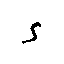

------------------------------------------------------------------------------------------------------------------------------------------------------
f
prevchar: 32  currChar: 102  Nextchar: 97 lineno: 21 charno:36
image is :


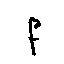

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 102  currChar: 97  Nextchar: 109 lineno: 21 charno:37
image is :


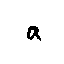

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 97  currChar: 109  Nextchar: 105 lineno: 21 charno:38
image is :


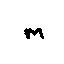

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 109  currChar: 105  Nextchar: 108 lineno: 21 charno:39
image is :


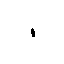

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 105  currChar: 108  Nextchar: 121 lineno: 21 charno:40
image is :


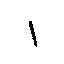

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 108  currChar: 121  Nextchar: 32 lineno: 21 charno:41
image is :


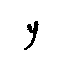

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 32  currChar: 109  Nextchar: 101 lineno: 21 charno:43
image is :


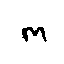

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 109  currChar: 101  Nextchar: 109 lineno: 21 charno:44
image is :


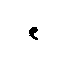

------------------------------------------------------------------------------------------------------------------------------------------------------
m
prevchar: 101  currChar: 109  Nextchar: 98 lineno: 21 charno:45
image is :


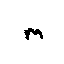

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 109  currChar: 98  Nextchar: 101 lineno: 21 charno:46
image is :


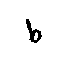

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 98  currChar: 101  Nextchar: 114 lineno: 21 charno:47
image is :


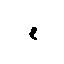

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 101  currChar: 114  Nextchar: 115 lineno: 21 charno:48
image is :


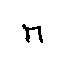

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 114  currChar: 115  Nextchar: 32 lineno: 21 charno:49
image is :


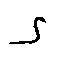

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 21 counted chars:42 actual chars: 42 lineno: 21 charno:50
------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 110
image is :


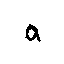

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 97  currChar: 110  Nextchar: 100 lineno: 22 charno:1
image is :


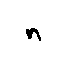

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 22 charno:2
image is :


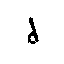

------------------------------------------------------------------------------------------------------------------------------------------------------
b
prevchar: 32  currChar: 98  Nextchar: 117 lineno: 22 charno:4
image is :


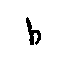

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 98  currChar: 117  Nextchar: 115 lineno: 22 charno:5
image is :


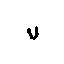

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 117  currChar: 115  Nextchar: 105 lineno: 22 charno:6
image is :


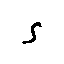

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 115  currChar: 105  Nextchar: 110 lineno: 22 charno:7
image is :


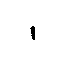

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 105  currChar: 110  Nextchar: 101 lineno: 22 charno:8
image is :


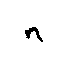

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 110  currChar: 101  Nextchar: 115 lineno: 22 charno:9
image is :


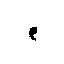

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 115 lineno: 22 charno:10
image is :


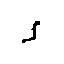

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 115  currChar: 115  Nextchar: 32 lineno: 22 charno:11
image is :


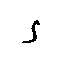

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 22 charno:13
image is :


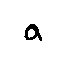

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 115 lineno: 22 charno:14
image is :


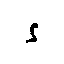

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 115  currChar: 115  Nextchar: 111 lineno: 22 charno:15
image is :


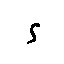

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 115  currChar: 111  Nextchar: 99 lineno: 22 charno:16
image is :


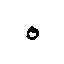

------------------------------------------------------------------------------------------------------------------------------------------------------
c
prevchar: 111  currChar: 99  Nextchar: 105 lineno: 22 charno:17
image is :


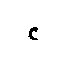

------------------------------------------------------------------------------------------------------------------------------------------------------
i
prevchar: 99  currChar: 105  Nextchar: 97 lineno: 22 charno:18
image is :


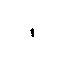

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 105  currChar: 97  Nextchar: 116 lineno: 22 charno:19
image is :


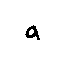

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 97  currChar: 116  Nextchar: 101 lineno: 22 charno:20
image is :


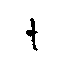

------------------------------------------------------------------------------------------------------------------------------------------------------
e
prevchar: 116  currChar: 101  Nextchar: 115 lineno: 22 charno:21
image is :


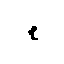

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 101  currChar: 115  Nextchar: 32 lineno: 22 charno:22
image is :


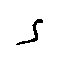

------------------------------------------------------------------------------------------------------------------------------------------------------
t
prevchar: 32  currChar: 116  Nextchar: 111 lineno: 22 charno:24
image is :


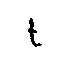

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 116  currChar: 111  Nextchar: 32 lineno: 22 charno:25
image is :


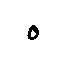

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 32  currChar: 115  Nextchar: 97 lineno: 22 charno:27
image is :


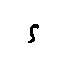

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 115  currChar: 97  Nextchar: 121 lineno: 22 charno:28
image is :


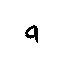

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 97  currChar: 121  Nextchar: 32 lineno: 22 charno:29
image is :


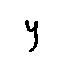

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 115 lineno: 22 charno:31
image is :


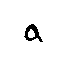

------------------------------------------------------------------------------------------------------------------------------------------------------
s
prevchar: 97  currChar: 115  Nextchar: 32 lineno: 22 charno:32
image is :


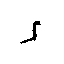

------------------------------------------------------------------------------------------------------------------------------------------------------
y
prevchar: 32  currChar: 121  Nextchar: 111 lineno: 22 charno:34
image is :


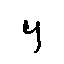

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 121  currChar: 111  Nextchar: 117 lineno: 22 charno:35
image is :


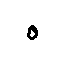

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 32 lineno: 22 charno:36
image is :


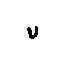

------------------------------------------------------------------------------------------------------------------------------------------------------
l
prevchar: 32  currChar: 108  Nextchar: 111 lineno: 22 charno:38
image is :


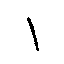

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 108  currChar: 111  Nextchar: 111 lineno: 22 charno:39
image is :


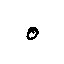

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 111  currChar: 111  Nextchar: 107 lineno: 22 charno:40
image is :


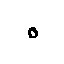

------------------------------------------------------------------------------------------------------------------------------------------------------
k
prevchar: 111  currChar: 107  Nextchar: 32 lineno: 22 charno:41
image is :


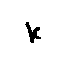

------------------------------------------------------------------------------------------------------------------------------------------------------
a
prevchar: 32  currChar: 97  Nextchar: 114 lineno: 22 charno:43
image is :


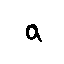

------------------------------------------------------------------------------------------------------------------------------------------------------
r
prevchar: 97  currChar: 114  Nextchar: 111 lineno: 22 charno:44
image is :


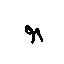

------------------------------------------------------------------------------------------------------------------------------------------------------
o
prevchar: 114  currChar: 111  Nextchar: 117 lineno: 22 charno:45
image is :


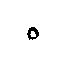

------------------------------------------------------------------------------------------------------------------------------------------------------
u
prevchar: 111  currChar: 117  Nextchar: 110 lineno: 22 charno:46
image is :


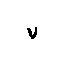

------------------------------------------------------------------------------------------------------------------------------------------------------
n
prevchar: 117  currChar: 110  Nextchar: 100 lineno: 22 charno:47
image is :


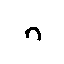

------------------------------------------------------------------------------------------------------------------------------------------------------
d
prevchar: 110  currChar: 100  Nextchar: 32 lineno: 22 charno:48
image is :


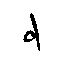

------------------------------------------------------------------------------------------------------------------------------------------------------
line number 22 counted chars:41 actual chars: 41 lineno: 22 charno:49
------------------------------------------------------------------------------------------------------------------------------------------------------


In [23]:
pagepath = '/content/drive/MyDrive/intelligent_font_files/PNG+TXT_files/page1/page1.jpg'
pagetxtpath = '/content/drive/MyDrive/intelligent_font_files/PNG+TXT_files/page1/page1.txt'
xlsxfilepath = '/content/FinalDataset.xlsx'
up = 2 #specific up value for specific page


def addcontenttoxlsefile(xlsxfilepath, pagepath, pagetxtpath, up, side_len): 
  rb = xlrd.open_workbook(xlsxfilepath)
  wb = copy(rb)
  w_sheet = wb.get_sheet(0)
  lenofdf = 1+len(pd.read_excel(xlsxfilepath))
  rows, cols, image = image_details(pagepath)
  x = [[255 for i in range(side_len)] for j in range(side_len)]
  k = 0
  with open(pagetxtpath) as f:
    lines = f.readlines()
  line_number = 0
  while k< rows:
    if image[k][15] < 250:
      aoao = bfs(k-up, 15, pagepath)
      char_no = 0 
      counted_chars = 0
      for i in range(15, cols):
        xoxo = bfs(k-up, i, pagepath)
        if len(xoxo) > 5 and isapprox(xoxo, aoao)> 3:
          
          yoyo = adjustvalues(xoxo, side_len)
          for ro,co in yoyo:
            if ro in range(side_len) and co in range(side_len):
              x[ro][co] =0
          
          while lines[line_number][char_no] == ' ': 
            char_no = char_no +1 
          print(lines[line_number][char_no])
          aoao = xoxo
          position = positionofchar(xoxo, line_number, char_no)
          if char_no == 0:
            w_sheet.write(lenofdf,0, ' ')
            w_sheet.write(lenofdf,1, lines[line_number][char_no])
            w_sheet.write(lenofdf,2, lines[line_number][char_no+1] )
            w_sheet.write(lenofdf,3, str(position))
            w_sheet.write(lenofdf,4, str(x))
            print('prevchar: ' + str(32) + '  currChar: ' + str(ord(lines[line_number][char_no])) + '  Nextchar: ' + str(ord(lines[line_number][char_no+1])))
            print('image is :')
            x = numpy.array(x)
            cv2_imshow(x)
            print('------------------------------------------------------------------------------------------------------------------------------------------------------') 
          
          if counted_chars+1 == actualchars(lines[line_number]):
            w_sheet.write(lenofdf,0, lines[line_number][char_no-1])
            w_sheet.write(lenofdf,1, lines[line_number][char_no])
            w_sheet.write(lenofdf,2, ' ' )
            w_sheet.write(lenofdf,3, str(position))
            w_sheet.write(lenofdf,4, str(x))
            print('prevchar: ' + str(ord(lines[line_number][char_no-1])) + '  currChar: ' + str(ord(lines[line_number][char_no])) + '  Nextchar: ' + str(32) + ' lineno: ' + str(line_number) + ' charno:' + str(char_no))
            print('image is :')
            x = numpy.array(x)
            cv2_imshow(x)
            print('------------------------------------------------------------------------------------------------------------------------------------------------------') 
          
          if 0 < char_no < len(lines[line_number])-2:
            w_sheet.write(lenofdf,0, lines[line_number][char_no-1])
            w_sheet.write(lenofdf,1, lines[line_number][char_no])
            w_sheet.write(lenofdf,2, lines[line_number][char_no+1] )
            w_sheet.write(lenofdf,3,  str(position))
            w_sheet.write(lenofdf,4, str(x))
            print('prevchar: ' + str(ord(lines[line_number][char_no-1])) + '  currChar: ' + str(ord(lines[line_number][char_no])) + '  Nextchar: ' + str(ord(lines[line_number][char_no+1]))+ ' lineno: ' + str(line_number) + ' charno:' + str(char_no))
            print('image is :')
            x = numpy.array(x)
            cv2_imshow(x)
            print('------------------------------------------------------------------------------------------------------------------------------------------------------')
          counted_chars = counted_chars + 1
          char_no = char_no + 1
          lenofdf = lenofdf +1
          x = [[255 for i in range(side_len)] for j in range(side_len)]
      
      print('line number ' + str(line_number) +' counted chars:' +str(counted_chars) + ' actual chars: ' + str(actualchars(lines[line_number])) + ' lineno: ' + str(line_number) + ' charno:' + str(char_no))
      print('------------------------------------------------------------------------------------------------------------------------------------------------------') 
      wb.save(xlsxfilepath)
      # break
      if counted_chars != actualchars(lines[line_number]):
        testt = input()
      k = k + 10
      line_number = line_number + 1 
      # testt = input()
    k=k+1

addcontenttoxlsefile(xlsxfilepath, pagepath, pagetxtpath, up, 64)


In [22]:
df = pd.read_excel(r'/content/FinalDataset.xlsx')
print(df)
print(len(df))

    Prev Charactor Charactor Next Charactor  \
0                          f              o   
1                f         o              l   
2                o         l              l   
3                l         l              o   
4                l         o              w   
..             ...       ...            ...   
992              a         r              o   
993              r         o              u   
994              o         u              n   
995              u         n              d   
996              n         d                  

                                          spatial info  \
0                  [[0, 0], [39.14141414141414, 67.0]]   
1     [[0, 1], [44.83673469387755, 84.26530612244898]]   
2    [[0, 2], [40.78666666666667, 100.57333333333334]]   
3    [[0, 3], [44.61971830985915, 110.21126760563381]]   
4    [[0, 4], [47.951219512195124, 121.390243902439...   
..                                                 ...   
992            [[22, 44], [12